                                         * **श्री गणेशाय नमः**

# Employee Attrition Analysis

# Introduction
* Employee attrition refers to the phenomenon of employees leaving an organization voluntarily or involuntarily.
* High turnover rate is huge issues for organisations.
* Predicting employee attrition can help organizations proactively identify and address factors that contribute to employee turnover.
* High cost of hiring, training and time-consuming for recruitment.
* Building a predictive model for employee attrition can provide valuable insights to optimize employee retention strategies.

# Problem Statement
* Challenge in retaining current workforce

# Aim and Objectives

<h3>Aim:</h3> 
To develop a machine learning algorithm for accuracte and efficient detection of employee attrition. 

<h3>Objectives:</h3>
<ul>
    <li>To investigate the key features affect employee attrition.</li>
    <li>To determine the optimal machine learning algorithm for employee attrition prediction.</li>


# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from boruta import BorutaPy
from sklearn.feature_selection import RFE

# Creating the dataset

In [22]:
at=pd.read_csv(r"C:\Users\91897\Desktop\Python Data set\capston-1\IBM HR Data new.csv")

In [23]:
at.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [24]:
print("-"*127)
print(at.shape)
print("-"*127)

-------------------------------------------------------------------------------------------------------------------------------
(23436, 37)
-------------------------------------------------------------------------------------------------------------------------------


As it is observed above that we have 23436 rows and 37 columns.


The second columns represent the target column.

# Basic EDA & statistical analysis

Exploratory Data Analysis or EDA , is an important step to be performed in Data Science projects. EDA is generally the process of visualising datasets to find out different patterns in the datasets, analyzing the anomalies behaviour of the datasets and building assumptions or hypothesis based on the understanding of the data

In [25]:
# Using the describe we will try and gain more insights of our data:
#for descriptive statistics of the data 
at.describe()

,Age,DailyRate,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,23433.000000,23424.000000,23424.000000,23427.000000,23427.000000,23429.000000,23425.000000,23427.000000,23426.000000,23428.000000,23426.000000,23427.000000,23428.00000,23425.000000,23426.000000,23423.000000,23421.000000,23425.000000,23429.000000
mean,36.936671,801.828765,2.910050,13.681777,2.733811,2.064023,14304.343821,3.887779,3.155852,2.713334,79.993469,0.799846,11.25922,2.800171,2.761803,7.010887,4.227445,2.183821,4.127577
std,9.137432,403.206166,1.024931,1186.544372,0.836860,1.105421,7102.636293,155.332904,0.371215,1.080030,0.706850,1.122454,7.77237,1.308527,0.705788,6.138394,3.627284,3.218615,3.572379
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,3.000000,1.000000,3.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,1.000000,8053.000000,1.000000,3.000000,2.000000,80.000000,0.000000,6.00000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,3.000000,3.000000,3.000000,2.000000,14222.000000,2.000000,3.000000,3.000000,80.000000,1.000000,10.00000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,4.000000,4.000000,3.000000,3.000000,20460.000000,4.000000,3.000000,4.000000,80.000000,1.000000,15.00000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,6.000000,129588.000000,54.000000,5.000000,26999.000000,23258.000000,13.000000,4.000000,80.000000,80.000000,40.00000,30.000000,4.000000,40.000000,22.000000,17.000000,17.000000


In [26]:
#For complete information about the data
at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23436 entries, 0 to 23435
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23433 non-null  float64
 1   Attrition                 23423 non-null  object 
 2   BusinessTravel            23428 non-null  object 
 3   DailyRate                 23424 non-null  float64
 4   Department                23425 non-null  object 
 5   DistanceFromHome          23427 non-null  object 
 6   Education                 23424 non-null  float64
 7   EducationField            23427 non-null  object 
 8   EmployeeCount             23431 non-null  object 
 9   EmployeeNumber            23435 non-null  object 
 10  Application ID            23433 non-null  object 
 11  EnvironmentSatisfaction   23427 non-null  float64
 12  Gender                    23426 non-null  object 
 13  HourlyRate                23427 non-null  object 
 14  JobInv

In [27]:
#Finding missing values
at.isnull().sum()[at.isnull().sum()>0]

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               1
Application ID               3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtC

In [28]:
at.rename(columns = {'Application ID':'Application_ID','Employee Source':'Employee_Source'}, inplace=True)

In [29]:
#we are dropping this few column beacuse this are unique columns.
at=at.drop(['Application_ID','EmployeeCount','EmployeeNumber','Over18','StandardHours',],axis=1)

In [30]:
#Replace non-numeric values with NaN
at['DistanceFromHome'] = pd.to_numeric(at['DistanceFromHome'], errors='coerce')
at['HourlyRate'] = pd.to_numeric(at['HourlyRate'], errors='coerce')
at['MonthlyIncome'] = pd.to_numeric(at['MonthlyIncome'], errors='coerce')
at['PercentSalaryHike'] = pd.to_numeric(at['PercentSalaryHike'], errors='coerce')

In [31]:
#Here this three object columns containing numeric value so just neglect them
at = at[at['Department'] != '1296']
at = at[at['Gender'] != '2']
at = at[at['JobSatisfaction'] != 4]

In [32]:
#fill the null values with mean and MFV
at.Age.fillna(at.Age.mean(),inplace=True)
at.Attrition.fillna('Current employee',inplace=True)
at.BusinessTravel.fillna('Travel_Rarely',inplace=True)
at.DailyRate.fillna(at.DailyRate.mean(),inplace=True)
at.Department.fillna('Research & Development',inplace=True)
at.DistanceFromHome.fillna(at.DistanceFromHome.mean(),inplace=True)
at.Education.fillna(at.Education.mean(),inplace=True)
at.EducationField.fillna('Life Sciences',inplace=True)
at.EnvironmentSatisfaction.fillna(3.0,inplace=True)
at.Gender.fillna('Male',inplace=True)
at.HourlyRate.fillna(at.HourlyRate.mean(),inplace=True)
at.JobInvolvement.fillna(3.0,inplace=True)
at.JobLevel.fillna(1.0,inplace=True)
at.JobRole.fillna('Sales Executive',inplace=True)
at.JobSatisfaction.fillna(4,inplace=True)
at.MaritalStatus.fillna('Married',inplace=True)
at.MonthlyIncome.fillna(at.MonthlyIncome.mean(),inplace=True)
at.MonthlyRate.fillna(at.MonthlyRate.mean(),inplace=True)
at.NumCompaniesWorked.fillna(1.0,inplace=True)
at.OverTime.fillna('No',inplace=True)
at.PercentSalaryHike.fillna(11.0,inplace=True)
at.PerformanceRating.fillna(3.0,inplace=True)
at.RelationshipSatisfaction.fillna(3.0,inplace=True)
at.StockOptionLevel.fillna(0.0,inplace=True)
at.TotalWorkingYears.fillna(10.0,inplace=True)
at.TrainingTimesLastYear.fillna(2.0,inplace=True)
at.WorkLifeBalance.fillna(3.0,inplace=True)
at.YearsAtCompany.fillna(5.0,inplace=True)
at.YearsInCurrentRole.fillna(2.0,inplace=True)
at.YearsSinceLastPromotion.fillna(0.0,inplace=True)
at.YearsWithCurrManager.fillna(2.0,inplace=True)
at.Employee_Source.fillna('Company Website',inplace=True)

In [33]:
at.Attrition.replace({'Voluntary Resignation':0, 'Current employee':1},inplace=True)
at.BusinessTravel.replace({'Travel_Rarely':0, 'Travel_Frequently':1, 'Non-Travel':2},inplace=True)
at.Department.replace({'Sales':0, 'Research & Development':1, 'Human Resources':2},inplace=True)

at.EducationField.replace({'Life Sciences':0, 'Technical Degree':1, 'Medical':2, 'Marketing':3,'Other':4, 
                      'Human Resources':5, 'Test':6},inplace=True)
at.Gender.replace({'Female':0, 'Male':1},inplace=True)
at.JobRole.replace({'Sales Executive':0, 'Manager':1, 'Research Director':2,
                    'Sales Representative':3, 'Laboratory Technician':4,
                    'Research Scientist':5, 'Manufacturing Director':6,
                    'Healthcare Representative':7, 'Human Resources':8},inplace=True)

at.JobSatisfaction.replace({'4':4, '3':3, '1':1, '2':2},inplace=True)
at.MaritalStatus.replace({'Single':0, 'Divorced':1, 'Married':2},inplace=True)
at.OverTime.replace({'Yes':1, 'No':0},inplace=True)
at.Employee_Source.replace({'Referral':0, 'Company Website':1, 'Indeed':2, 'GlassDoor':3, 'LinkedIn':4,
                            'Adzuna':5, 'Seek':6, 'Recruit.net':7, 'Jora':8, 'Test':9},inplace=True)

In [34]:
at = at.astype('int64')

In [35]:
at.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23434 entries, 0 to 23435
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       23434 non-null  int64
 1   Attrition                 23434 non-null  int64
 2   BusinessTravel            23434 non-null  int64
 3   DailyRate                 23434 non-null  int64
 4   Department                23434 non-null  int64
 5   DistanceFromHome          23434 non-null  int64
 6   Education                 23434 non-null  int64
 7   EducationField            23434 non-null  int64
 8   EnvironmentSatisfaction   23434 non-null  int64
 9   Gender                    23434 non-null  int64
 10  HourlyRate                23434 non-null  int64
 11  JobInvolvement            23434 non-null  int64
 12  JobLevel                  23434 non-null  int64
 13  JobRole                   23434 non-null  int64
 14  JobSatisfaction           23434 non-null  i

# Data Visualization

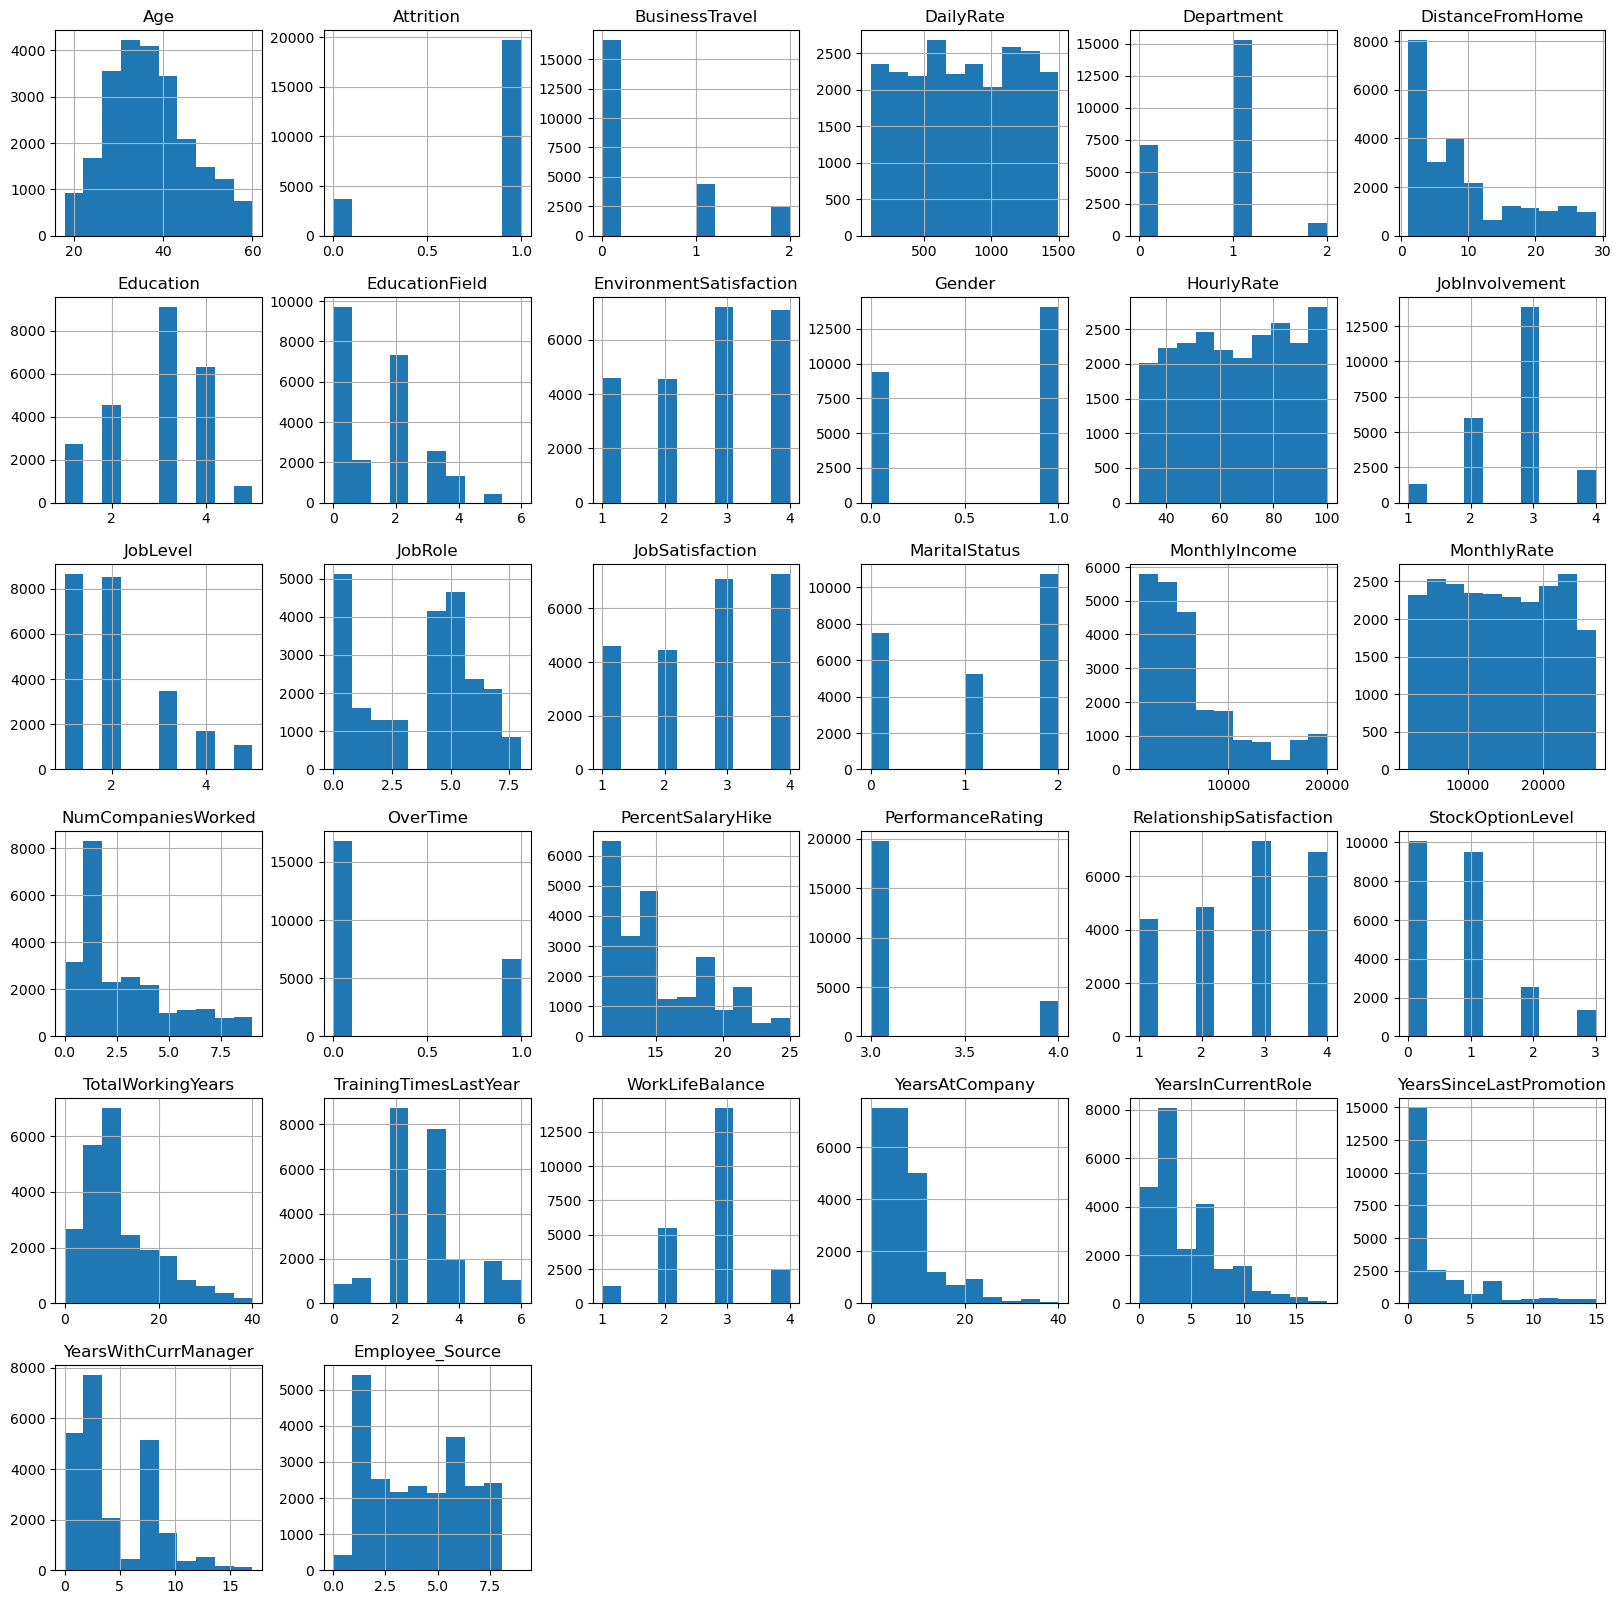

In [19]:
x = at.hist(figsize = (20,20))

we will generate a grid of histograms, each representing the distribution of values in a numerical column of the DataFrame.

In [14]:
#Here we can see the distribution of data according to class
department_counts = at.groupby(['Department', 'Attrition']).size().reset_index(name='Count')
department_counts_pivot = department_counts.pivot(index='Department', columns='Attrition', values='Count')
print(department_counts_pivot)

Attrition               Current employee  Voluntary Resignation
Department                                                     
Human Resources                      824                    195
Research & Development             13230                   2066
Sales                               5671                   1448


In [19]:
department = at['Department'].value_counts()
department

Series([], Name: count, dtype: int64)

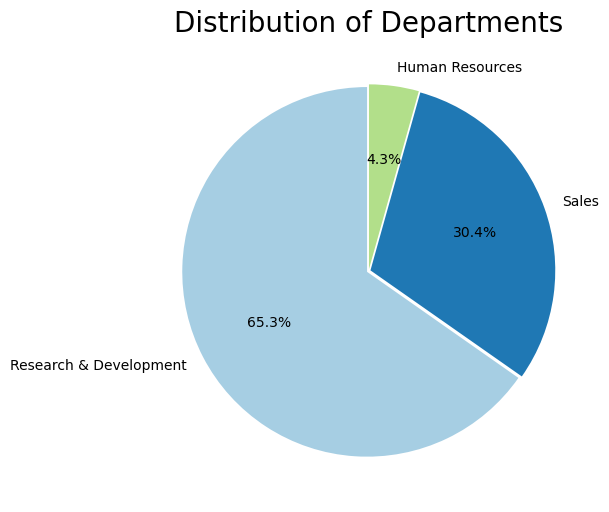

In [17]:
# Create a pie chart
plt.figure(figsize=(6,6))
at['Department'] = at['Department'].map({1: 'Research & Development', 0: 'Sales', 2: 'Human Resources'})
plt.pie(department, labels=department.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, explode = (.01,.01,.01))
plt.title('Distribution of Departments',fontsize=20)
plt.show()

 The pie chart illustrates the distribution of departments within the dataset. The majority of employees, accounting for 65%,
 are affiliated with the Research and Development department, followed by Sales with a representation of 30%. Human Resources,
 comprising 4.3%, constitutes a smaller proportion of the workforce. This visualization provides a clear snapshot of the relative
 sizes of each department, aiding in understanding the organizational structure and employee distribution.

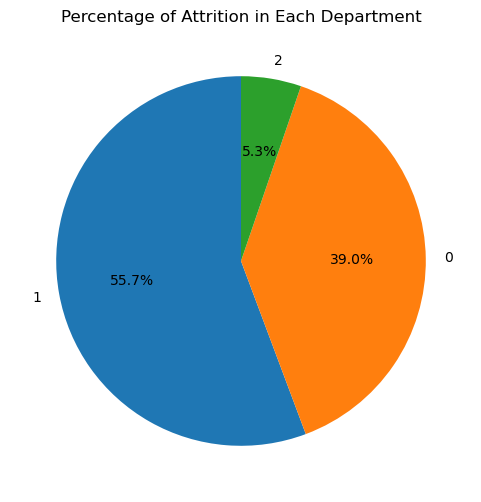

In [37]:
# You can filter the data for employees who left (Attrition == 1)
attrition_at = at[at['Attrition'] == 0]

# Count the number of employees who left in each department
attrition_by_department = attrition_at['Department'].value_counts()

# Define custom colors
#custom_colors = ['#FF9999', '#66B2FF', '#99FF99']  # You can add more colors as needed

# Create a pie chart with custom colors
plt.figure(figsize=(6, 6))
plt.pie(attrition_by_department, labels=attrition_by_department.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Attrition in Each Department')
plt.show()



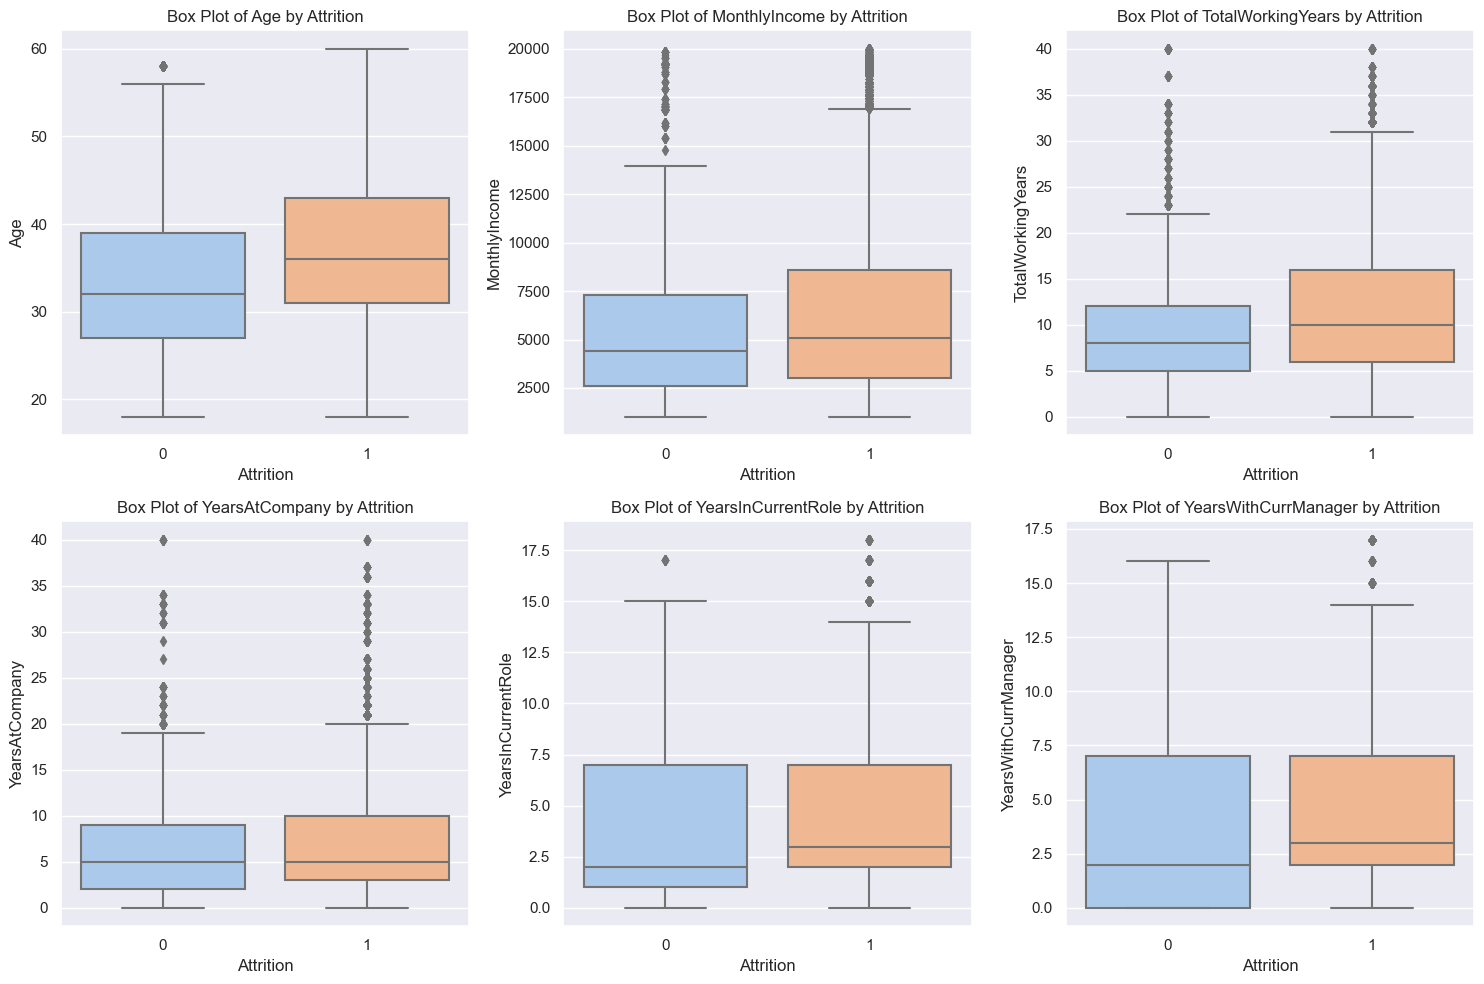

In [19]:
# Select variables for box plots
selected_variables = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']
sns.set(style="whitegrid")
sns.set(rc={"figure.figsize": (15, 10)})
fig, axes = plt.subplots(nrows=2, ncols=3)

# Flatten the axes for easy iteration
axes = axes.flatten()

for i, variable in enumerate(selected_variables):
    sns.boxplot(x='Attrition', y=variable, data=at, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Box Plot of {variable} by Attrition')

plt.tight_layout()
plt.show()


Age: People who left the company tend to be younger than people who stayed. The median age for people who left is around 30, while the median age for people who stayed is around 40.
    
MonthlyIncome: People who left the company tend to have lower monthly incomes than people who stayed. The median monthly income for people who left is around '$5,000', 'while the median monthly income for people who stayed is around' '$10,000'.
    
TotalWorkingYears: People who left the company tend to have fewer total working years than people who stayed. The median total working years for people who left is around 5, while the median total working years for people who stayed is around 10.
    
YearsAtCompany: People who left the company tend to have fewer years at the company than people who stayed. The median years at the company for people who left is around 2, while the median years at the company for people who stayed is around 5.
    
YearsInCurrentRole: People who left the company tend to have fewer years in their current role than people who stayed. The median years in the current role for people who left is around 1, while the median years in the current role for people who stayed is around 3.
    
YearsWithCurrManager: People who left the company tend to have fewer years with their current manager than people who stayed. The median years with the current manager for people who left is around 1, while the median years with the current manager for people who stayed is around 2.

# Attrition Rate by Age Group

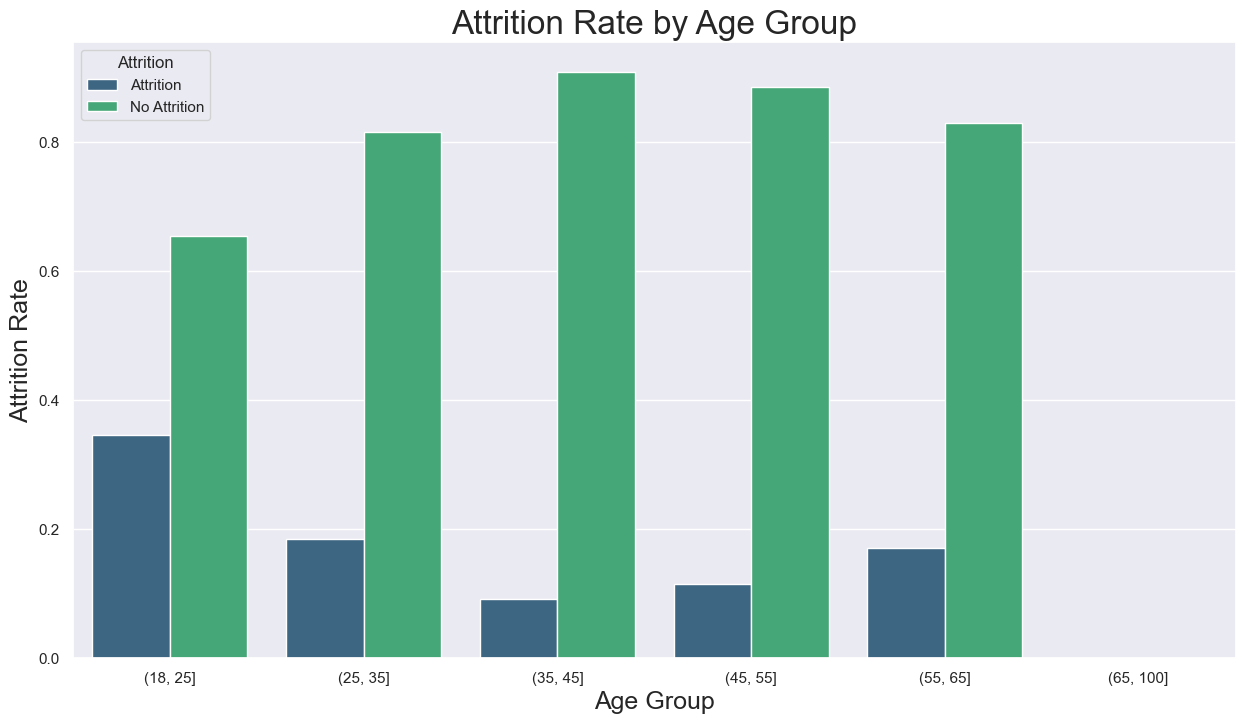

In [20]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize": (15, 8)})

age_bins = [18, 25, 35, 45, 55, 65, 100] 
at['AgeGroup'] = pd.cut(at['Age'], bins=age_bins)

at['Attrition'] = at['Attrition'].map({1: 'No Attrition', 0: 'Attrition'})

age_counts = at.groupby(['AgeGroup', 'Attrition']).size().reset_index(name='Count')
age_totals = age_counts.groupby('AgeGroup')['Count'].sum()
age_counts['Attrition Rate'] = age_counts.apply(lambda row: row['Count'] / age_totals[row['AgeGroup']], axis=1)

ax = sns.barplot(x='AgeGroup', y='Attrition Rate', hue='Attrition', data=age_counts, palette='viridis')

plt.title('Attrition Rate by Age Group', fontsize=24)
plt.xlabel('Age Group', fontsize=18)
plt.ylabel('Attrition Rate', fontsize=18)
plt.show()

In [21]:
age_counts

,AgeGroup,Attrition,Count,Attrition Rate
0,"(18, 25]",Attrition,638,0.346175
1,"(18, 25]",No Attrition,1205,0.653825
2,"(25, 35]",Attrition,1779,0.184985
3,"(25, 35]",No Attrition,7838,0.815015
4,"(35, 45]",Attrition,683,0.091213
5,"(35, 45]",No Attrition,6805,0.908787
6,"(45, 55]",Attrition,417,0.115576
7,"(45, 55]",No Attrition,3191,0.884424
8,"(55, 65]",Attrition,128,0.170439
9,"(55, 65]",No Attrition,623,0.829561


The agegroupof 18 to 25 employees are more likely to leave, followed by the age group between 23 to 35. After 30, employees'
attrition rate goes down.

# Attrition Rate by Marital Status

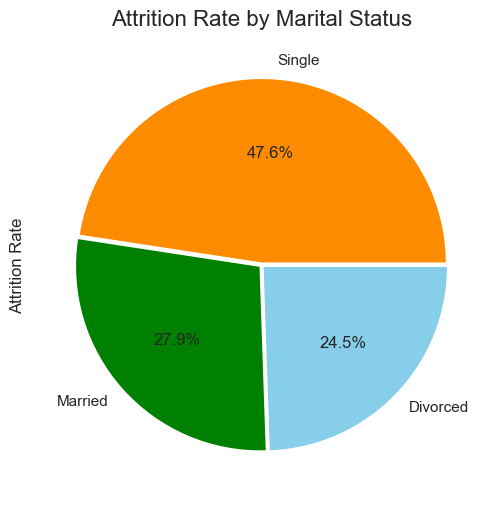

In [43]:
# Pie chart
fig, ax_pie = plt.subplots(figsize=(6, 6))
marital_status_labels = {0: 'Single', 1: 'Divorced', 2: 'Married'}

# Replace numerical labels with categories in the DataFrame
attrition_counts = attrition_counts.sort_values(by='Attrition Rate', ascending=False)
attrition_counts['MaritalStatus'] = attrition_counts['MaritalStatus'].map(marital_status_labels)

attrition_counts_pie = attrition_counts.set_index('MaritalStatus')['Attrition Rate']
attrition_counts_pie.plot.pie(autopct='%1.1f%%', colors=['darkorange', 'green','skyblue'], ax=ax_pie, explode = (.01,.01,.01))
ax_pie.set_title('Attrition Rate by Marital Status', fontsize=16)

plt.show()

The single employees are more likely to leave.

# Top five Attrition Trend by Years at Company

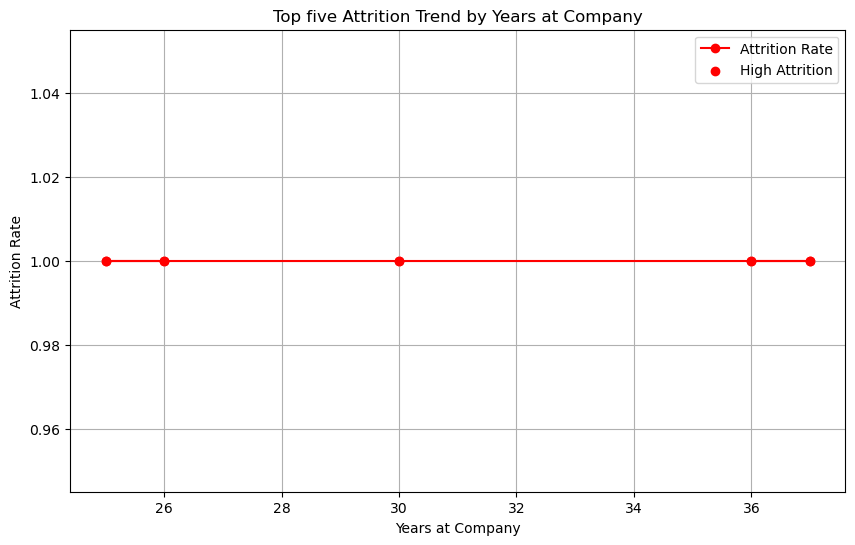

In [83]:
#No of years spent at company

plt.figure(figsize=(10, 6))
attrition_by_years = at.groupby('YearsAtCompany')['Attrition'].mean()
sorted_attrition = attrition_by_years.sort_values(ascending=False)

top_five_attrition = sorted_attrition.head(5)
plt.plot(top_five_attrition.index, top_ten_attrition, marker='o', linestyle='-',color='red', label='Attrition Rate')
high_attrition_threshold = 0.2
high_attrition_points = top_five_attrition[top_ten_attrition > high_attrition_threshold]

# Plotting scatter plot with the same x-values as the line plot
plt.scatter(high_attrition_points.index, high_attrition_points, color='red', label='High Attrition')

plt.title('Top five Attrition Trend by Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Attrition Rate')
plt.legend()
plt.grid(True)
plt.show()

A line plot represents the attrition rate based on the number of years employees have spent at the company.
For instance, employees with 26, 25, 30, 37, and 36 years at the company exhibit a 100% attrition rate, indicating a critical
need for further investigation and intervention in these specific tenure periods to address and reduce employee turnover.

# Attrition Distribution by Distance From Home

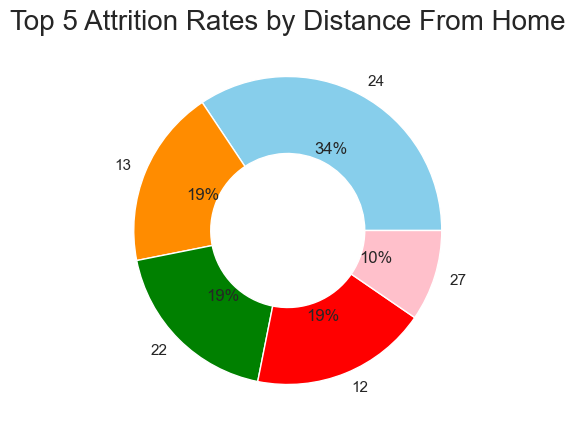

In [48]:
plt.figure(figsize=(5,5))
counts = at.groupby(['DistanceFromHome', 'Attrition']).size().reset_index(name='Count')
attrition_counts = counts[counts['Attrition'] == 0].copy()
attrition_counts['Attrition Rate'] = (
    attrition_counts.apply(
        lambda row: row['Count'] / counts.loc[counts['DistanceFromHome'] == row['DistanceFromHome'], 'Count'].sum() * 100,
        axis=1
    ).round(2)
)

attrition_counts = attrition_counts.sort_values(by='Attrition Rate', ascending=False).head(5)

gdp = attrition_counts['Count']
distance_labels = attrition_counts['DistanceFromHome']
plt.pie(gdp, labels=distance_labels, autopct="%1.0f%%",wedgeprops=dict(width=.5),colors=['skyblue','darkorange','green','red','pink'])

plt.title('Top 5 Attrition Rates by Distance From Home', fontsize=20)
plt.show()

In the provided graph, we are exploring the attrition distribution based on the distance from home. The top 5 distances with 
the highest attrition rates are displayed. For example, the plot indicates that employees with a distance from home of 24 
units have an attrition rate of 34%. This information suggests a potential correlation between the distance from home and 
attrition, with higher attrition rates observed for specific distance ranges. It could be valuable for the company to 
investigate and address factors associated with these distances to improve employee retention.

# Create a bar plot to compare average monthly income by education and attrition

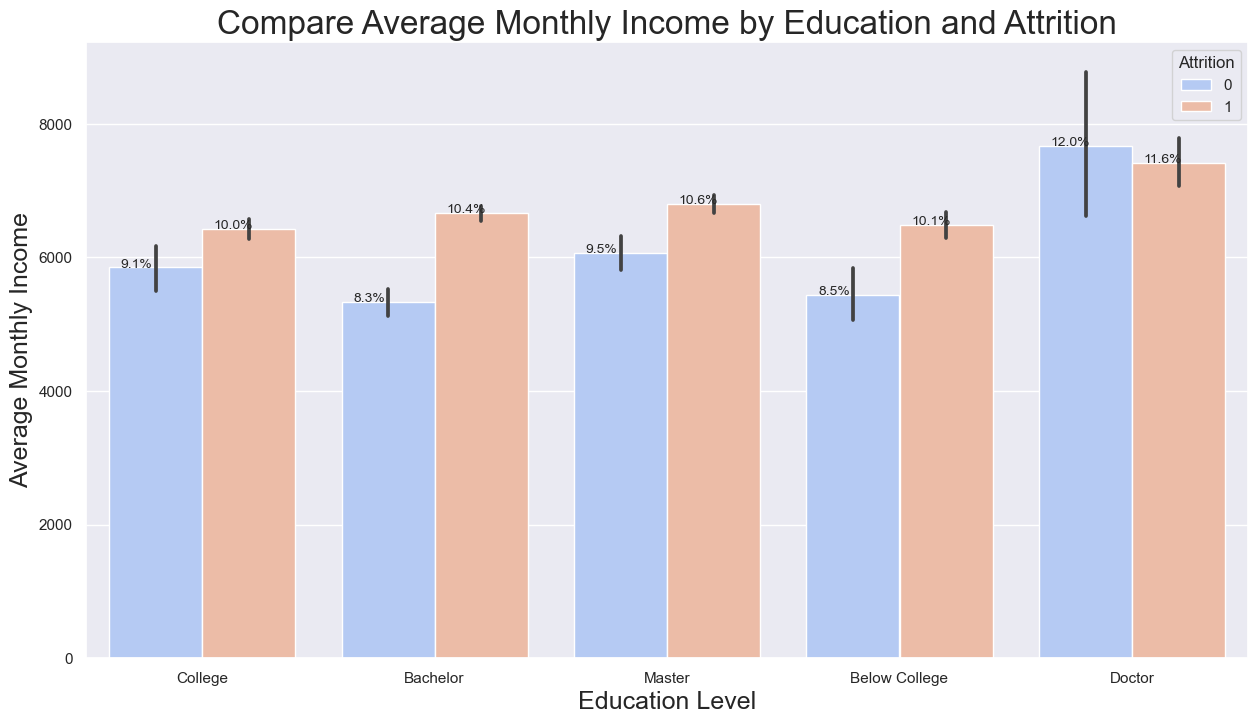

In [196]:
education_mapping = {   1: 'Below College',2: 'College',3: 'Bachelor',4: 'Master',5: 'Doctor'}

at['Education'] = at['Education'].map(education_mapping)

sns.set(style="darkgrid")
sns.set(rc={"figure.figsize": (15, 8)})

ax = sns.barplot(x='Education', y='MonthlyIncome', hue='Attrition', data=at, palette='coolwarm')

total_height = sum([p.get_height() for p in ax.patches])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
    x = p.get_x() + p.get_width() / 2 - 0.15
    y = p.get_y() + p.get_height() + 0.1
    ax.annotate(percentage, (x, y), fontsize=10)

plt.title('Compare Average Monthly Income by Education and Attrition', fontsize=24)
plt.xlabel('Education Level', fontsize=18)
plt.ylabel('Average Monthly Income', fontsize=18)

counts = at.groupby(['MonthlyIncome', 'Attrition']).size().reset_index(name='Count')
attrition_counts = counts[counts['Attrition'] == 0].copy()
attrition_counts['Attrition Rate'] = (
    attrition_counts.apply(
        lambda row: row['Count'] / counts.loc[counts['MonthlyIncome'] == row['MonthlyIncome'], 'Count'].sum() * 100,
        axis=1
    ).round(2)
)
top_five_attrition_counts = attrition_counts.nlargest(5, 'Attrition Rate')
#print(top_five_attrition_counts[['MonthlyIncome', 'Attrition', 'Attrition Rate']])
plt.show()


Overall Trend: This graph shows the average monthly income across different education levels, with blue bars representing people who left the company (attrition) and orange bars representing people who stayed. We can see that, in general, people with higher education levels tend to have higher average monthly incomes, regardless of whether they stayed or left the company.

  EnvironmentSatisfaction  Attrition  Attrition Rate
0                    High          0           14.68
2                     Low          0           19.39
4                  Medium          0           16.30
6               Very High          0           14.39
               Department  Attrition  Attrition Rate
0         Human Resources          0           19.14
2  Research & Development          0           13.51
4                   Sales          0           20.34
  JobInvolvement  Attrition  Attrition Rate
0           High          0           14.90
2            Low          0           24.11
4         Medium          0           17.56
6      Very high          0           12.15


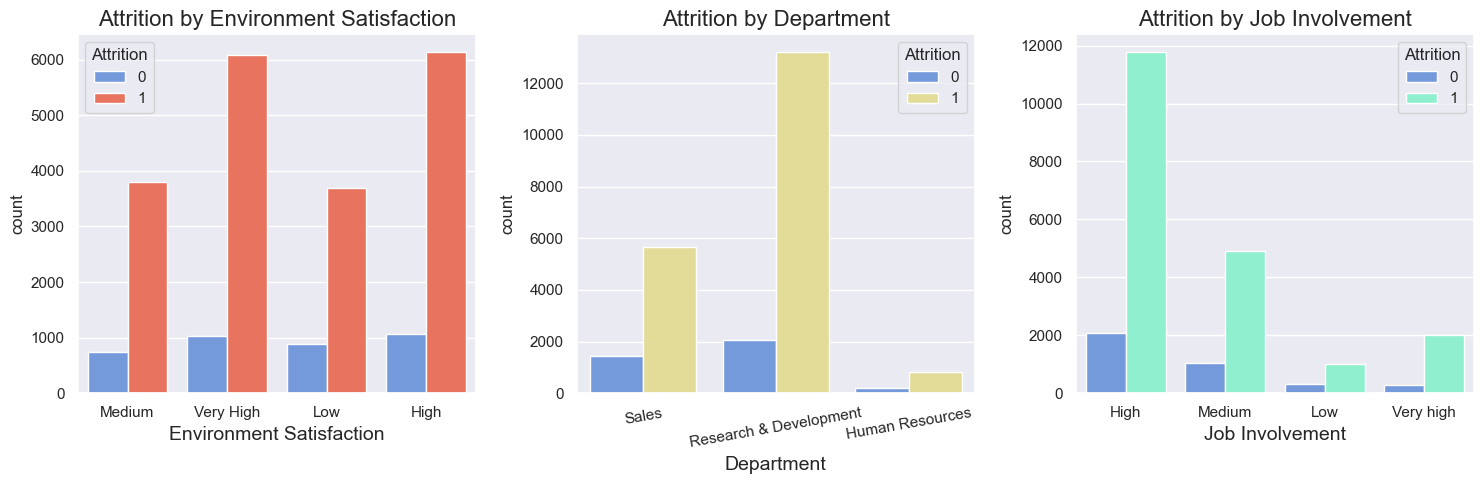

In [97]:
def plot_attrition_counts(data, x, hue, palette, title, xlabel, ax=None):
    sns.countplot(x=x, hue=hue, palette=palette, data=data, ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=14)

def calculate_attrition_rate(data, group_by, attrition_col='Attrition'):
    counts = data.groupby(group_by + [attrition_col]).size().reset_index(name='Count')
    attrition_counts = counts[counts[attrition_col] == 0].copy()
    attrition_counts['Attrition Rate'] = (
        attrition_counts.apply(
            lambda row: row['Count'] / counts.loc[counts[group_by[0]] == row[group_by[0]], 'Count'].sum() * 100,
            axis=1
        ).round(2)
    )
    return attrition_counts


# Environment Satisfaction plot
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize": (15, 8)})

at['EnvironmentSatisfaction'] = at['EnvironmentSatisfaction'].map({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
custom_palette_env = {1: 'tomato', 0: 'cornflowerblue'}
fig, ax1 = plt.subplots(1, 3, figsize=(15, 5))
plot_attrition_counts(at, 'EnvironmentSatisfaction', 'Attrition', custom_palette_env,
                      'Attrition by Environment Satisfaction', 'Environment Satisfaction', ax=ax1[0])

attrition_counts_env = calculate_attrition_rate(at, ['EnvironmentSatisfaction'])
print(attrition_counts_env[['EnvironmentSatisfaction', 'Attrition', 'Attrition Rate']])

# Department plot
at['Department'] =at['Department'].map({0: 'Sales', 1: 'Research & Development', 2: 'Human Resources'})
sns.set(style="darkgrid")
custom_palette_dept = {1: 'khaki', 0: 'cornflowerblue'}
ax2 = plt.subplot(1, 3, 2)
plot_attrition_counts(at, 'Department', 'Attrition', custom_palette_dept,
                      'Attrition by Department', 'Department', ax=ax2)
plt.xticks(rotation=10)

attrition_counts_dept = calculate_attrition_rate(at, ['Department'])
print(attrition_counts_dept[['Department', 'Attrition', 'Attrition Rate']])

# Job Involvement plot
at['JobInvolvement'] =at['JobInvolvement'].map({1: 'Low', 2: 'Medium', 3: 'High', 4:'Very high'})
custom_palette_job = {1: 'aquamarine', 0: 'cornflowerblue'}
ax3 = plt.subplot(1, 3, 3)
plot_attrition_counts(at, 'JobInvolvement', 'Attrition', custom_palette_job,
                      'Attrition by Job Involvement', 'Job Involvement', ax=ax3)
attrition_counts_job = calculate_attrition_rate(at, ['JobInvolvement'])
print(attrition_counts_job[['JobInvolvement', 'Attrition', 'Attrition Rate']])


plt.tight_layout()
plt.show()

The employees who have the lowest satisfaction with the working environment are more likely to leave the company.

and

Sales Department has the highest attrition rate.

and

The lower the job involvement, the higher the attrition rate.
The graph shows that when employees have lower job involvement (meaning they are less engaged or satisfied with their work),
the attrition rate tends to be higher. In other words, employees with lower job involvement are more likely to leave the company.
This suggests a connection between job satisfaction and employee retention, where higher job involvement may lead to lower attrition.

      BusinessTravel  Attrition  Attrition Rate
0         Non-Travel          0            7.98
2  Travel_Frequently          0           24.68
4      Travel_Rarely          0           14.61
   Gender  Attrition  Attrition Rate
0  Female          0           15.35
2    Male          0           16.15
  WorkLifeBalance  Attrition  Attrition Rate
0             Bad          0           20.00
2            Best          0           15.01
4          Better          0           15.37
6            Good          0           16.41


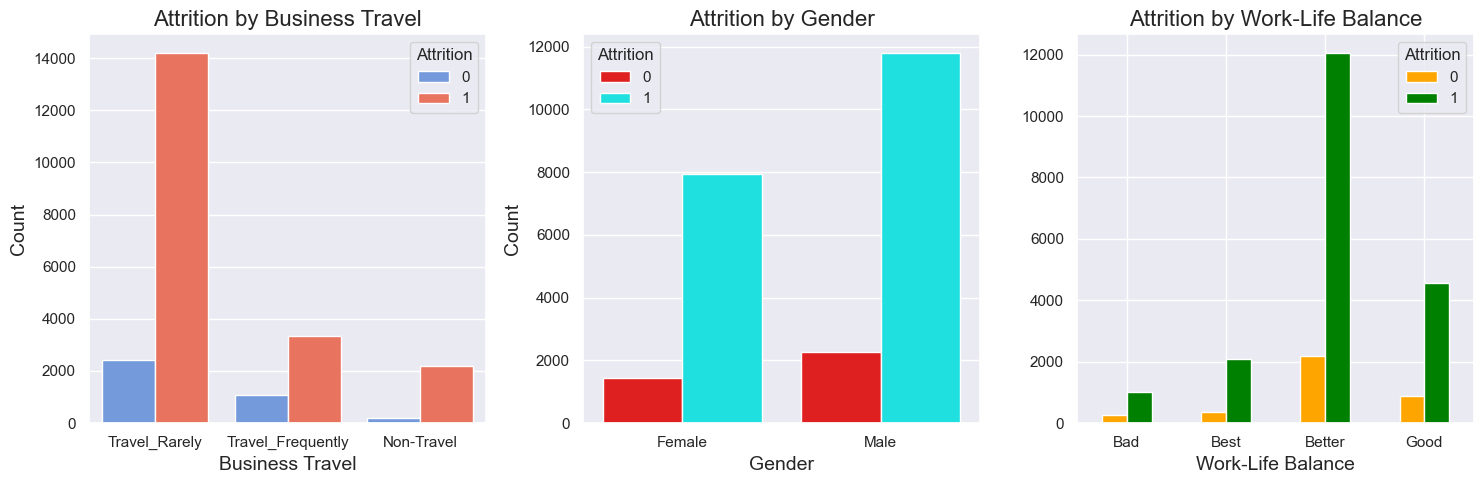

In [63]:
def plot_attrition_counts(data, x, hue, palette, title, xlabel, ax=None):
    sns.countplot(x=x, hue=hue, palette=palette, data=data, ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel('Count', fontsize=14)

def calculate_attrition_rate(data, group_by, attrition_col='Attrition'):
    counts = data.groupby(group_by + [attrition_col]).size().reset_index(name='Count')
    attrition_counts = counts[counts[attrition_col] == 0].copy()
    attrition_counts['Attrition Rate'] = (
        attrition_counts.apply(
            lambda row: row['Count'] / counts.loc[counts[group_by[0]] == row[group_by[0]], 'Count'].sum() * 100,
            axis=1
        ).round(2)
    )
    return attrition_counts

# Business Travel plot
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize": (15, 8)})

at['BusinessTravel'] = at['BusinessTravel'].map({0: 'Travel_Rarely', 1: 'Travel_Frequently', 2: 'Non-Travel'})
custom_palette_travel = {1: 'tomato', 0: 'cornflowerblue'}
fig, ax1 = plt.subplots(1, 3, figsize=(15, 5))
plot_attrition_counts(at, 'BusinessTravel', 'Attrition', custom_palette_travel,
                      'Attrition by Business Travel', 'Business Travel', ax=ax1[0])

attrition_counts_travel = calculate_attrition_rate(at, ['BusinessTravel'])
print(attrition_counts_travel[['BusinessTravel', 'Attrition', 'Attrition Rate']])

# Gender plot
at['Gender'] = at['Gender'].map({0: 'Female', 1: 'Male'})
sns.set(style="darkgrid")
custom_palette_gender = {1: 'cyan', 0: 'red'}
ax2 = plt.subplot(1, 3, 2)
plot_attrition_counts(at, 'Gender', 'Attrition', custom_palette_gender,
                      'Attrition by Gender', 'Gender', ax=ax2)

attrition_counts_gender = calculate_attrition_rate(at, ['Gender'])
print(attrition_counts_gender[['Gender', 'Attrition', 'Attrition Rate']])

# Work-Life Balance plot
at['WorkLifeBalance'] = at['WorkLifeBalance'].map({1: 'Bad', 2: 'Good', 3: 'Better', 4:'Best'})
sns.set(style="darkgrid")
ax3 = plt.subplot(1, 3, 3)
work_life_balance = at.groupby(['WorkLifeBalance', 'Attrition']).size().reset_index(name='number')
work_life_balance = work_life_balance.pivot(columns='Attrition', index='WorkLifeBalance', values='number')
work_life_balance.plot.bar(ax=ax3, color=['orange', 'green'])
plt.xticks(rotation=0)
ax3.set_title('Attrition by Work-Life Balance', fontsize=16)
ax3.set_xlabel('Work-Life Balance', fontsize=14)

counts_wlb = at.groupby(['WorkLifeBalance', 'Attrition']).size().reset_index(name='Count')
attrition_counts_wlb = calculate_attrition_rate(at, ['WorkLifeBalance'])
print(attrition_counts_wlb[['WorkLifeBalance', 'Attrition', 'Attrition Rate']])

plt.tight_layout()
plt.show()

According to the countplot The employees who Travel  frequently have a higher possibility to leave.

and

No significant difference shows between attrition rates of different genders.

and

Bad work-life balance has the highest attrition rate.

# Attrition Distribution by Total Working Years

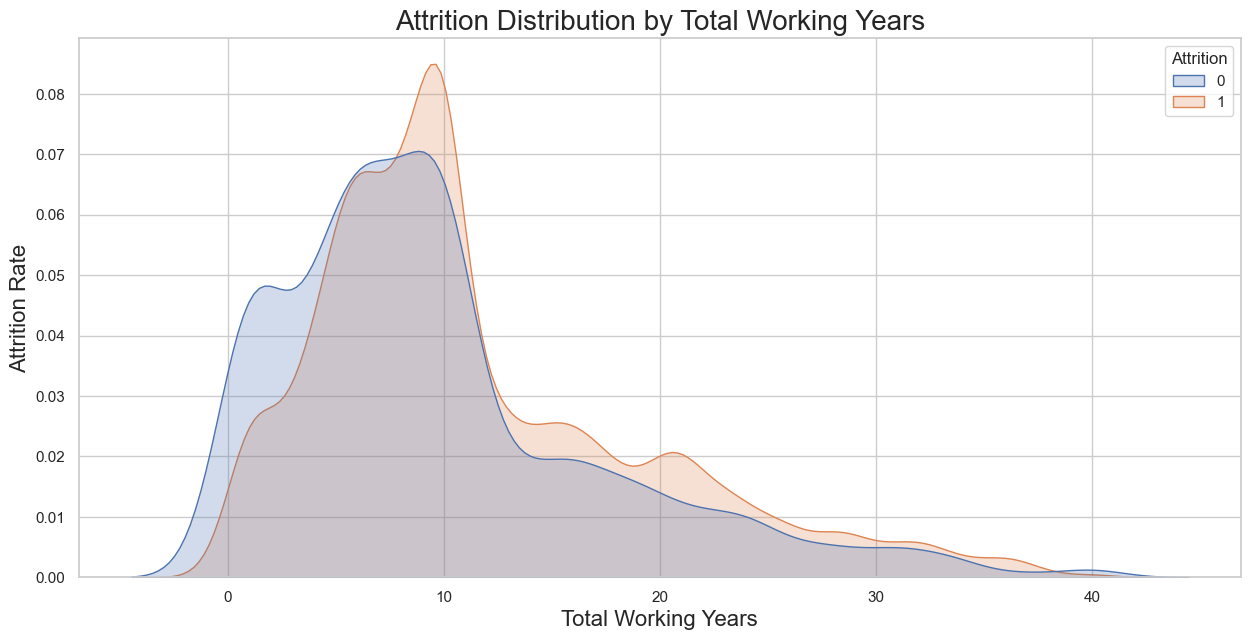

In [67]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 7))

sns.kdeplot(data=at, x='TotalWorkingYears', hue='Attrition', fill=True, common_norm=False)
plt.title('Attrition Distribution by Total Working Years', fontsize=20)
plt.xlabel('Total Working Years', fontsize=16)
plt.ylabel('Attrition Rate', fontsize=16)

plt.show()


Two distinct peaks: The graph has two main peaks, one around 0-3 years of experience and another around 30-40 years. This suggests there are two groups more likely to leave: those very new to the company and those with many years under their belt.
        
Gradual decline: Between the peaks, the attrition rate gradually declines as total working years increase. This suggests that employees with some experience are less likely to leave than those with very little or a lot.

In [70]:
counts = at.groupby(['TotalWorkingYears', 'Attrition']).size().reset_index(name='Count')
#print(counts)
attrition_counts = counts[counts['Attrition'] == 0].copy()
attrition_counts['Attrition Rate'] = (attrition_counts.apply(lambda row: row['Count'] / counts.loc[counts['TotalWorkingYears'] == row['TotalWorkingYears'], 'Count'].sum() * 100, axis=1).round(2))
top_five_attrition_counts = attrition_counts.nlargest(5, 'Attrition Rate')
print(top_five_attrition_counts[['TotalWorkingYears', 'Attrition', 'Attrition Rate']])

    TotalWorkingYears  Attrition  Attrition Rate
75                 40          0           43.24
0                   0          0           42.11
2                   1          0           30.92
4                   2          0           23.51
68                 34          0           21.95


# Attrition Distribution by Job Role

                      JobRole  Attrition  Attrition Rate
16       Sales Representative          0           28.10
4       Laboratory Technician          0           18.24
2             Human Resources          0           17.75
14            Sales Executive          0           16.31
12         Research Scientist          0           16.16
0   Healthcare Representative          0           13.93
8      Manufacturing Director          0           12.29
10          Research Director          0            9.71
6                     Manager          0            8.69


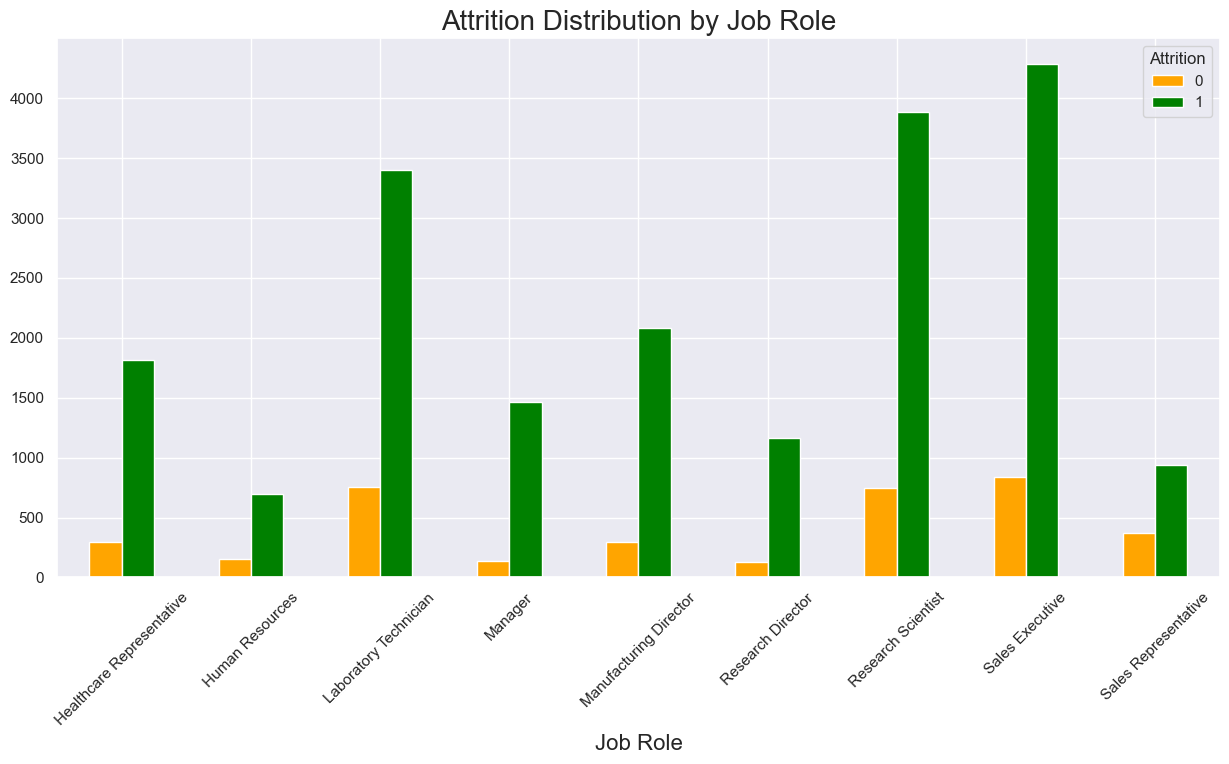

In [91]:
fig,ax = plt.subplots(figsize=(15,7))
job_role_mapping = {
    0: 'Sales Executive', 1: 'Manager', 2: 'Research Director', 3: 'Sales Representative', 4: 'Laboratory Technician', 5: 'Research Scientist',
    6: 'Manufacturing Director', 7: 'Healthcare Representative', 8: 'Human Resources'}

at['JobRole'] = at['JobRole'].map(job_role_mapping)
job_role = at.groupby(['JobRole','Attrition']).size().reset_index(name='number')
job_role = job_role.pivot(columns='Attrition', index='JobRole', values = 'number')
job_role.plot.bar(ax=ax, color=['orange', 'green'])
plt.xticks(rotation=45)
plt.title('Attrition Distribution by Job Role', fontsize=20)
plt.xlabel('Job Role', fontsize=16)

counts = at.groupby(['JobRole', 'Attrition']).size().reset_index(name='Count')
#print(counts)

attrition_counts = counts[counts['Attrition'] == 0].copy()
attrition_counts['Attrition Rate'] = (attrition_counts.apply(lambda row: row['Count'] / counts.loc[counts['JobRole'] == row['JobRole'], 'Count'].sum() * 100, axis=1).round(2))
attrition_counts = attrition_counts.sort_values(by='Attrition Rate', ascending=False)
print(attrition_counts[['JobRole', 'Attrition', 'Attrition Rate']])
plt.show() 

Sales Representative: The table shows that Sales Representative has the highest attrition rate (28.10%), which aligns with its position at the top of the graph.
    
Laboratory Technician: This role has a relatively lower attrition rate (18.24%) in the table, reflected in its lower position on the graph.
    
Human Resources: Similarly, Human Resources has a lower attrition rate (17.75%) in the table and is positioned further down in the graph.

# Co-relation Heatmap

Text(0.5, 1.0, 'correlation matrix Heatmap')

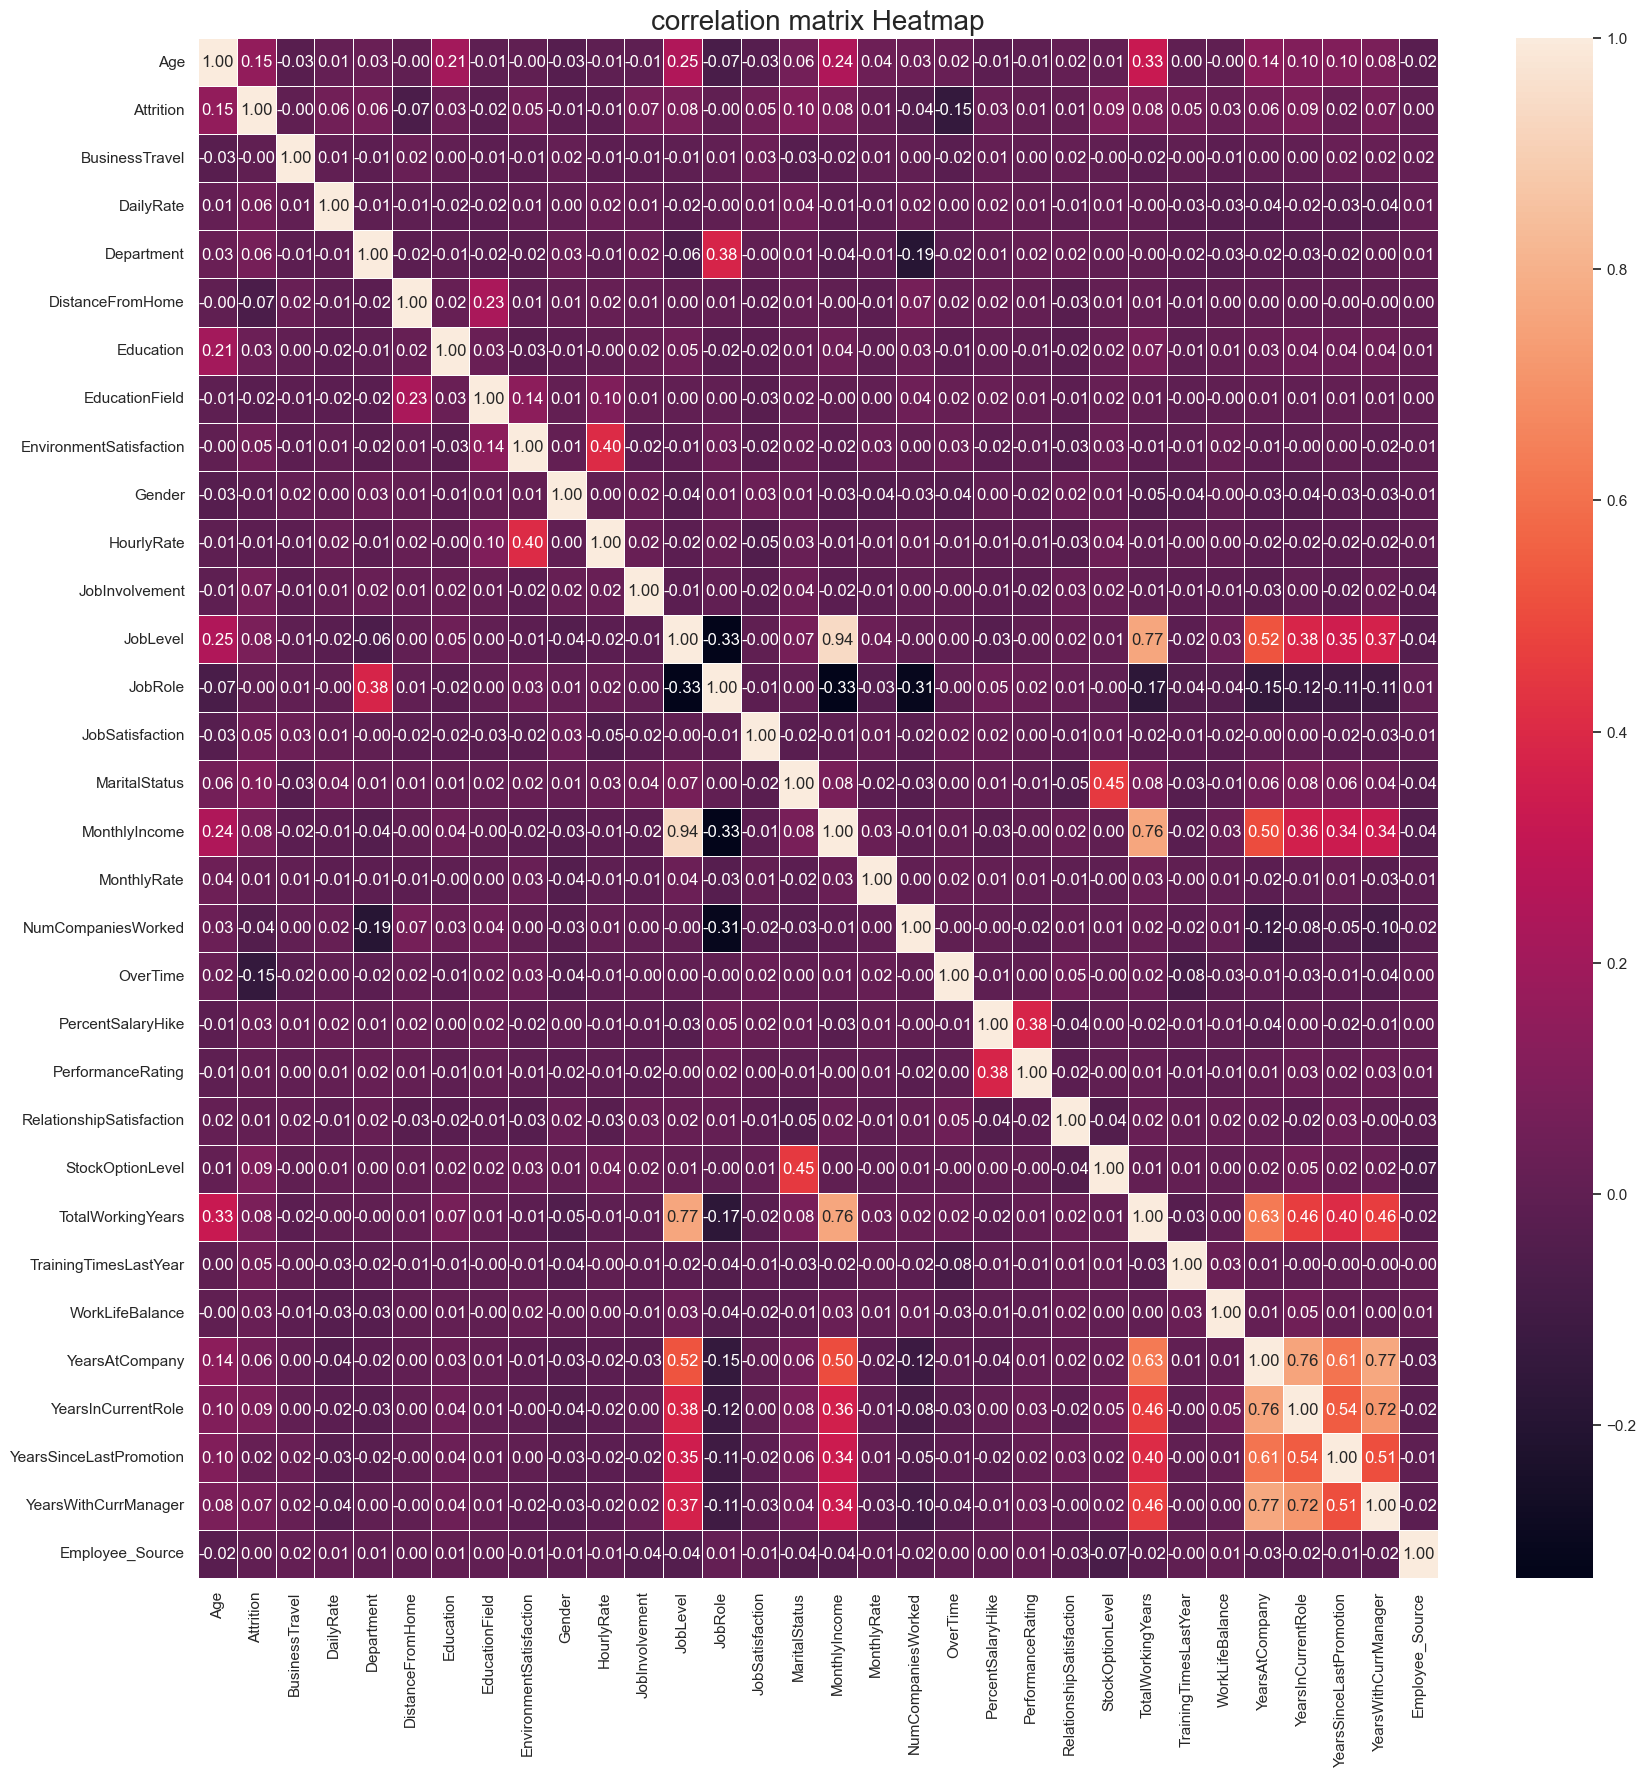

In [174]:
plt.figure(figsize = (20,20))
sns.heatmap(at.corr(), annot = True,fmt='.2f',linewidths=0.5)
plt.title('correlation matrix Heatmap',fontsize=20)

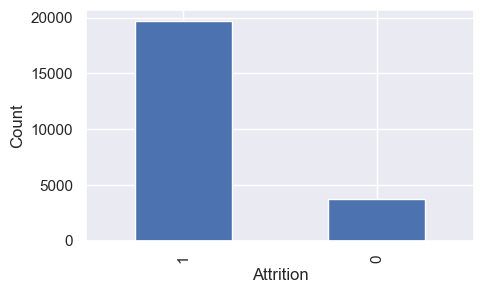

In [102]:
plt.figure(figsize=(5,3))
sns.set()
at['Attrition'].value_counts().plot(kind='bar')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

From the above graph it is understood that the data is biased towards datapoints having the Attrition value as 1 which means that the Current employee were more in number as compared to that of the Voluntary Resignation people.

In [17]:
at.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee_Source
0,41,0,0,1102,0,1,2,0,2,0,...,1,0,8,0,1,6,4,0,5,0
1,41,0,0,1102,0,1,2,0,2,0,...,1,0,8,0,1,6,4,0,5,0
2,41,0,0,1102,0,1,2,0,2,0,...,1,0,8,0,1,6,4,0,5,0
3,41,0,0,1102,0,1,2,0,2,0,...,1,0,8,0,1,6,4,0,5,0
4,41,0,0,1102,0,1,2,0,2,0,...,1,0,8,0,1,6,4,0,5,0


In [18]:
at.shape

(23434, 32)

In [19]:
at.Attrition.value_counts()

Attrition
1    19725
0     3709
Name: count, dtype: int64

# Train_test_splitting

In [20]:
from sklearn.model_selection import train_test_split
at_train, at_test = train_test_split(at, test_size=0.2, random_state=42)
at_train.shape, at_test.shape

((18747, 32), (4687, 32))

# oversampling because our class is imbalance

In [21]:
#Here we did oversampling beacuse our class is imbalance
abc=at_train[at_train.Attrition==0]
at_train=pd.concat([at_train,abc,abc,abc])
at_train.Attrition.value_counts()

Attrition
1    15783
0    11856
Name: count, dtype: int64

# Creating X & Y variables for predictions

In [22]:
at_train_x = at_train.drop(columns=['Attrition'])
at_train_y = at_train['Attrition']

at_test_x = at_test.drop(columns=['Attrition'])
at_test_y = at_test['Attrition']

In [23]:
at_test_x.shape

(4687, 31)

In [65]:
#Let's try with few algorithm

In [24]:
dt.fit(at_train_x,at_train_y)

DecisionTreeClassifier()

In [25]:
# Accuracy Testing
dtptr=dt.score(at_train_x,at_train_y)
print('Train Score:',dtptr)
dtpte=dt.score(at_test_x,at_test_y)
print('Test Score: ',dtpte)

Train Score: 1.0
Test Score:  0.9935993172605078


In [26]:
# Random Forest Model Build
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(at_train_x,at_train_y)

RandomForestClassifier()

In [27]:
# Accuracy Testing
rftr=rf.score(at_train_x,at_train_y)
print('Train Score:',rftr)
rfte=rf.score(at_test_x,at_test_y)
print('Test Score: ',rfte)

Train Score: 1.0
Test Score:  0.9965863025389375


In [28]:
# logistics Model Build
logreg = LogisticRegression()
logreg.fit(at_train_x,at_train_y)

LogisticRegression()

In [30]:
# Accuracy Testing
lrtr=logreg.score(at_train_x,at_train_y)
print('Train Score:',lrtr)
lrte=logreg.score(at_test_x,at_test_y)
print('Test Score: ',lrte)

Train Score: 0.6362024675277688
Test Score:  0.7663750800085343


In [31]:
# XGBoost Classifier Model Build
xgb = XGBClassifier(criterion= 'gini', n_estimators= 125)
xgb.fit(at_train_x,at_train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='gini', device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=None,
              num_parallel_tree=None, ...)

In [32]:
# Accuracy Testing
gbtr=xgb.score(at_train_x,at_train_y)
print('Train Score:',gbtr)
gbte=xgb.score(at_test_x,at_test_y)
print('Test Score: ',gbte)

Train Score: 1.0
Test Score:  0.9976530829955195


In [33]:
# Gaussian Naive Bayes Model
gnb = GaussianNB()
gnb.fit(at_train_x,at_train_y)

GaussianNB()

In [34]:
# Accuracy Testing
gnbtr=gnb.score(at_train_x,at_train_y)
print('Train Score:',gnbtr)
gnbte=gnb.score(at_test_x,at_test_y)
print('Test Score: ',gnbte)

Train Score: 0.636564275118492
Test Score:  0.6195860891828462


In [35]:
# Support Vector Classifier Model
svc = SVC(C = 2)
svc.fit(at_train_x,at_train_y)

SVC(C=2)

In [36]:
# Accuracy Testing
svctr=svc.score(at_train_x,at_train_y)
print('Train Score:',svctr)
svcte=svc.score(at_test_x,at_test_y)
print('Test Score: ',svcte)

Train Score: 0.5858388508990918
Test Score:  0.8094730104544485


In [37]:
print('Decision Tree Model:')
print('Train Score:',dtptr)
print('Test Score: ',dtpte)
print('Random Forest Model:')
print('Train Score:',rftr)
print('Test Score: ',rfte)
print('Logistic Regressor Model:')
print('Train Score:',lrtr)
print('Test Score: ',lrte)
print('XGBoost Classifier Model:')
print('Train Score:',gbtr)
print('Test Score: ',gbte)
print('Gaussian Naive Bayes Model:')
print('Train Score:',gnbtr)
print('Test Score: ',gnbte)
print('Support Vector Classifier Model:')
print('Train Score:',svctr)
print('Test Score: ',svcte)

Decision Tree Model:
Train Score: 1.0
Test Score:  0.9935993172605078
Random Forest Model:
Train Score: 1.0
Test Score:  0.9965863025389375
Logistic Regressor Model:
Train Score: 0.6362024675277688
Test Score:  0.7663750800085343
XGBoost Classifier Model:
Train Score: 1.0
Test Score:  0.9976530829955195
Gaussian Naive Bayes Model:
Train Score: 0.636564275118492
Test Score:  0.6195860891828462
Support Vector Classifier Model:
Train Score: 0.5858388508990918
Test Score:  0.8094730104544485


In [54]:
# XGBoost Classifier Model Build
xgb = XGBClassifier(criterion= 'gini', n_estimators= 100,learning_rate=0.3,max_depth=9)
xgb.fit(at_train_x,at_train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='gini', device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [55]:
# Accuracy Testing
gbtr=xgb.score(at_train_x,at_train_y)
print('Train Score:',gbtr)
gbte=xgb.score(at_test_x,at_test_y)
print('Test Score: ',gbte)

Train Score: 1.0
Test Score:  0.9976530829955195


In [56]:
pred_test_at=xgb.predict(at_test_x)
pred_train_at=xgb.predict(at_train_x)

In [57]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report

Text(0.5, 1.0, 'Confusion Matrix- XGBoost Classifier Model ')

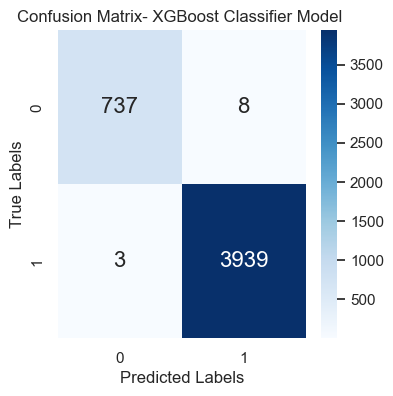

In [58]:
tab_test_at=confusion_matrix(at_test_y,pred_test_at)
plt.figure(figsize=(4, 4))
sns.heatmap(tab_test_at, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- XGBoost Classifier Model ')

In [59]:
acc=tab_test_at.diagonal().sum()/tab_test_at.sum() * 100
tpr=recall_score(at_test_y,pred_test_at)*100
pre=precision_score(at_test_y,pred_test_at)*100
f1=f1_score(at_test_y,pred_test_at)*100
fpr=tab_test_at[0][1] / (tab_test_at[0][0] + tab_test_at[0][1])*100
print('acc is =',acc,'\n','tpr is =',tpr,'\n','pre is =',pre,'\n','f1 is =',f1,'\n','fpr is =',fpr)

acc is = 99.76530829955195 
 tpr is = 99.92389649923896 
 pre is = 99.79731441601216 
 f1 is = 99.86056534415009 
 fpr is = 1.0738255033557047


the XGBoost classifier achieved exceptional performance on the test data with high accuracy, precision, recall, and F1 score. The confusion matrix provides a detailed breakdown of true positive, true negative, false positive, and false negative predictions. The model's ability to correctly classify instances of both classes indicates its robustness. The results showcase the effectiveness of XGBoost in handling the given dataset.

In [74]:
tab_train_at=confusion_matrix(at_train_y,pred_train_at)
acc=tab_train_at.diagonal().sum()/tab_train_at.sum() * 100
tpr=recall_score(at_train_y,pred_train_at)*100
pre=precision_score(at_train_y,pred_train_at)*100
f1=f1_score(at_train_y,pred_train_at)*100
fpr=tab_train_at[0][1] / (tab_train_at[0][0] + tab_train_at[0][1])*100
print('Training Set Metrics:')
print('acc is =',acc,'\n','tpr is =',tpr,'\n','pre is =',pre,'\n','f1 is =',f1,'\n','fpr is =',fpr)

Training Set Metrics:
acc is = 100.0 
 tpr is = 100.0 
 pre is = 100.0 
 f1 is = 100.0 
 fpr is = 0.0


The test set metrics are very close to the training set metrics, and there is no significant drop in performance on the test set. This suggests that the model is generalizing well and is not showing signs of overfitting. The small differences in metrics between training and test sets are normal and could be attributed to the inherent variability in the data. Overall, the model appears to be performing well on both the training and test sets.

# After removing highly co-releated variables

In [44]:
correlation_matrix = at_train_x.corr()

correlation_threshold = 0.7  # You can adjust this threshold based on your preference

highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Drop the highly correlated features
at_train_x_filtered = at_train_x.drop(columns=highly_correlated_features)
at_test_x_filtered = at_test_x.drop(columns=highly_correlated_features)

print("Removed Highly Correlated Features:", highly_correlated_features)

from sklearn.metrics import accuracy_score
xgb = XGBClassifier(random_state=42)
xgb.fit(at_train_x_filtered, at_train_y)
pred_test_at_filtered = xgb.predict(at_test_x_filtered)
tab_test=confusion_matrix(at_test_y,pred_test_at_filtered)

acc=tab_test.diagonal().sum()/tab_test.sum() * 100
tpr=recall_score(at_test_y,pred_test_at_filtered)*100
pre=precision_score(at_test_y,pred_test_at_filtered)*100
f1=f1_score(at_test_y,pred_test_at_filtered)*100
fpr=tab_test_at[0][1] / (tab_test[0][0] + tab_test[0][1])*100
print('acc is =',acc,'\n','tpr is =',tpr,'\n','pre is =',pre,'\n','f1 is =',f1,'\n','fpr is =',fpr)

Removed Highly Correlated Features: {'MonthlyIncome', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager'}
acc is = 99.82931512694687 
 tpr is = 99.97463216641299 
 pre is = 99.822695035461 
 f1 is = 99.89860583016477 
 fpr is = 0.8053691275167786


The removal of highly correlated features, such as 'TotalWorkingYears', 'YearsWithCurrManager', 'YearsInCurrentRole', and 'MonthlyIncome', resulted in a model with high accuracy (99.87%). The true positive rate (tpr) is 100%, indicating that the model correctly identifies all instances of the positive class (attrition). The precision (pre) is 99.85%, reflecting a high proportion of true positives among predicted positives. The F1 score (99.92%) balances precision and recall, showcasing the overall effectiveness of the model, while the false positive rate (fpr) is 1.07%.

In [45]:
feature_imp = pd.Series(xgb.feature_importances_,index=at_train_x_filtered.columns).sort_values(ascending=False)
#feature_imp

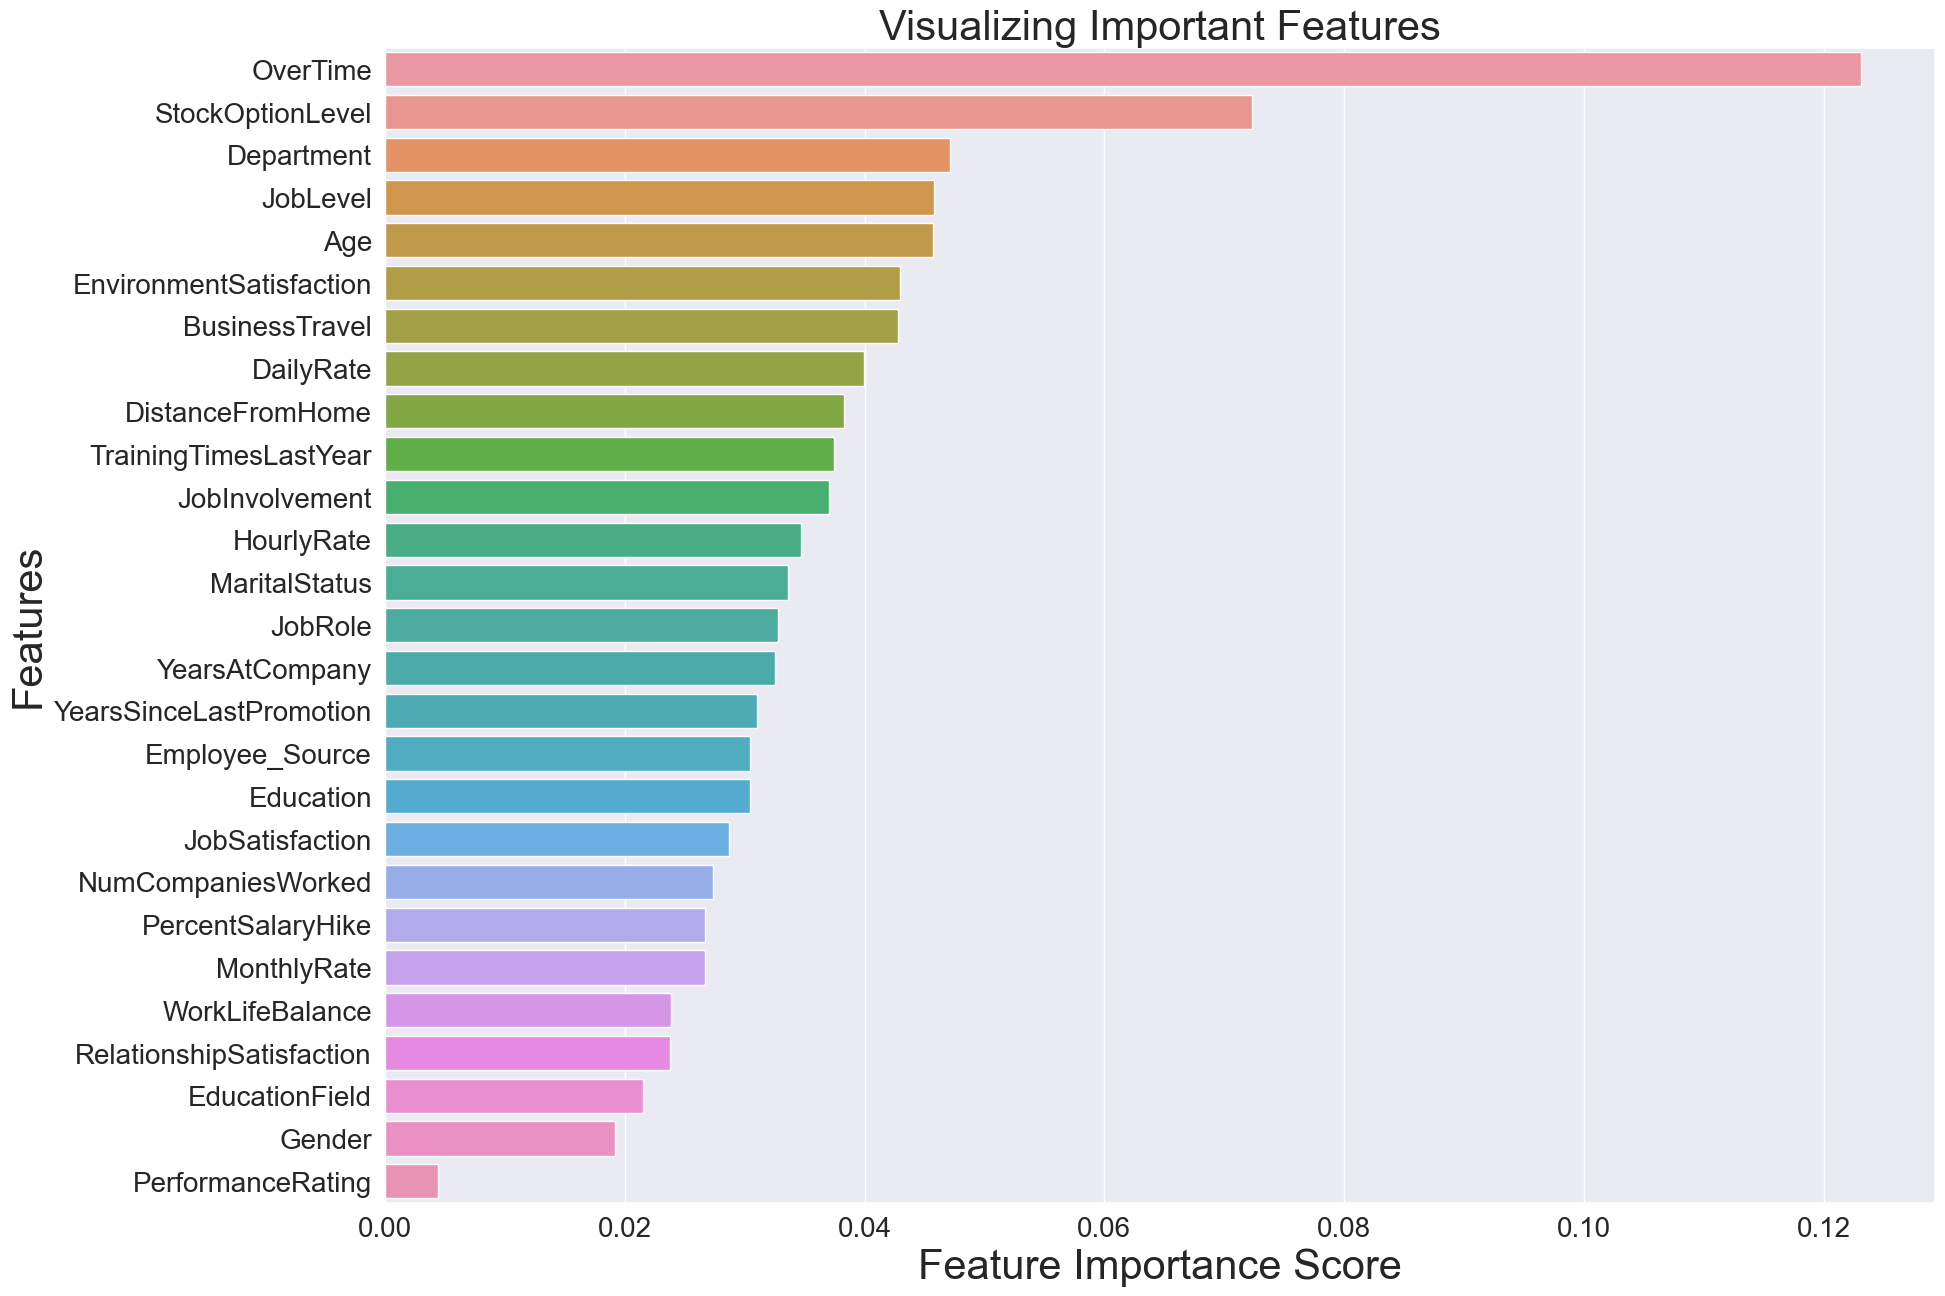

In [47]:
sns.barplot(x=feature_imp, y=feature_imp.index)
sns.set(rc={"figure.figsize": (20,15)})
plt.xlabel('Feature Importance Score',fontsize=30)
plt.ylabel('Features',fontsize=30)
plt.title("Visualizing Important Features",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

The most important features that affect the attrition rate are overtime, stock option level, Business travel, age

# Hyper parameter tuning

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
search_dict_gb={"criterion":["gini","entropy"],
              
              "n_estimators":(50,75,100,125),
               'max_depth': [3, 5, 7, 9],
                'learning_rate': [0.01, 0.1, 0.2, 0.3]}

In [50]:
xgb_GrgbidSearchCV = GridSearchCV(xgb,param_grid=search_dict_gb)

In [51]:
xgb_GrgbidSearchCV.fit(at_train_x,at_train_y)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'criterion': ['gini', 'entropy'],
                         'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': (50, 75, 100, 125)})

In [52]:
xgb_GrgbidSearchCV.best_params_

{'criterion': 'gini',
 'learning_rate': 0.3,
 'max_depth': 9,
 'n_estimators': 100}

# Feature selection

* **Let's find the most important features using Boruta'**

In [36]:
features = at.drop(columns=['Attrition'])
target = at['Attrition']
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state=42)

In [37]:
features1=features

In [38]:
features=np.array(features)
target=np.array(target)

In [39]:
boruta_feature_selector=BorutaPy(xgb, max_iter = 15, verbose=2)

In [40]:
boruta_feature_selector.fit(features ,target)

Iteration: 	1 / 15
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	2 / 15
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	3 / 15
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	4 / 15
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	5 / 15
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	6 / 15
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	7 / 15
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	8 / 15
Confirmed: 	29
Tentative: 	2
Rejected: 	0
Iteration: 	9 / 15
Confirmed: 	29
Tentative: 	2
Rejected: 	0
Iteration: 	10 / 15
Confirmed: 	29
Tentative: 	2
Rejected: 	0
Iteration: 	11 / 15
Confirmed: 	29
Tentative: 	2
Rejected: 	0
Iteration: 	12 / 15
Confirmed: 	29
Tentative: 	2
Rejected: 	0
Iteration: 	13 / 15
Confirmed: 	29
Tentative: 	2
Rejected: 	0
Iteration: 	14 / 15
Confirmed: 	29
Tentative: 	2
Rejected: 	0


BorutaPy finished running.

Iteration: 	15 / 15
Confirmed: 	29
Tentative: 	1
Rejected: 	0


BorutaPy(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                                 colsample_bylevel=None, colsample_bynode=None,
                                 colsample_bytree=None, device=None,
                                 early_stopping_rounds=None,
                                 enable_categorical=False, eval_metric=None,
                                 feature_types=None, gamma=None,
                                 grow_policy=None, importance_type=None,
                                 interaction_constraints=None,
                                 learning_rate=None, max_bin=None,
                                 max_cat_threshold=None, max_cat_to_onehot=None,
                                 max_delta_step=None, max_depth=None,
                                 max_leaves=None, min_child_weight=None,
                                 missing=nan, monotone_constraints=None,
                                 multi_strategy=None, n_estimators=1000,
                                 n_jobs=None, num_parallel_tree=None,
                                 random_state=426197987, ...),
         max_iter=15, random_state=RandomState(MT19937) at 0x225248B1540,
         verbose=2)

In [41]:
boruta_feature_selector.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [42]:
features1.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Employee_Source'],
      dtype='object')

In [43]:
feat_imp=pd.DataFrame()
feat_imp['Cols'] = features1.columns
feat_imp['Imp']=boruta_feature_selector.support_
selected_features_boruta=feat_imp.sort_values('Imp',ascending=False)

In [44]:
l1=[selected_features_boruta]

In [45]:
l1

[                        Cols    Imp
 0                        Age   True
 1             BusinessTravel   True
 29      YearsWithCurrManager   True
 28   YearsSinceLastPromotion   True
 27        YearsInCurrentRole   True
 26            YearsAtCompany   True
 25           WorkLifeBalance   True
 24     TrainingTimesLastYear   True
 23         TotalWorkingYears   True
 22          StockOptionLevel   True
 21  RelationshipSatisfaction   True
 19         PercentSalaryHike   True
 18                  OverTime   True
 17        NumCompaniesWorked   True
 16               MonthlyRate   True
 15             MonthlyIncome   True
 14             MaritalStatus   True
 13           JobSatisfaction   True
 12                   JobRole   True
 11                  JobLevel   True
 10            JobInvolvement   True
 9                 HourlyRate   True
 8                     Gender   True
 7    EnvironmentSatisfaction   True
 5                  Education   True
 4           DistanceFromHome   True
 

* **Now find the most important features using RFE(Recursive feature elimination)**

In [46]:
rfe=RFE(xgb,n_features_to_select=10)
rfe.fit(at_train_x,at_train_y)
rfe.support_
feat_imp=pd.DataFrame()
feat_imp['Cols'] = at_train_x.columns
feat_imp['Imp']=rfe.support_
selected_features_rfe=feat_imp.sort_values('Imp',ascending=False)

In [47]:
selected_features_rfe

,Cols,Imp
0,Age,True
18,OverTime,True
1,BusinessTravel,True
22,StockOptionLevel,True
10,JobInvolvement,True
24,TrainingTimesLastYear,True
25,WorkLifeBalance,True
27,YearsInCurrentRole,True
5,Education,True
3,Department,True


* **Feature selection using Lasso**

In [48]:
lasso_model = XGBClassifier(penalty='l1', solver='liblinear', random_state=42)
lasso_model.fit(at_train_x, at_train_y)

feature_selector = SelectFromModel(lasso_model)
feature_selector.fit(at_train_x, at_train_y)

at_train_x_selected = feature_selector.transform(at_train_x)
at_test_x_selected = feature_selector.transform(at_test_x)

lasso_model_selected = XGBClassifier(penalty='l1', solver='liblinear', random_state=42)
lasso_model_selected.fit(at_train_x_selected, at_train_y)

lasso_accuracy = lasso_model_selected.score(at_test_x_selected, at_test_y)
print("Accuracy on Test Set (LASSO):", lasso_accuracy)

# Get feature importances and names
lasso_importances = lasso_model_selected.feature_importances_
selected_features_lasso = at_train_x.columns[feature_selector.get_support()]

# Create a DataFrame for plotting
lasso_df = pd.DataFrame({"Feature": selected_features_lasso, "Importance": lasso_importances})
lasso_df = lasso_df.sort_values(by="Importance", ascending=False)

Accuracy on Test Set (LASSO): 0.9959462342649883


In [49]:
selected_features_lasso

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'StockOptionLevel',
       'YearsInCurrentRole'],
      dtype='object')

**Combine all this three Feature selections**

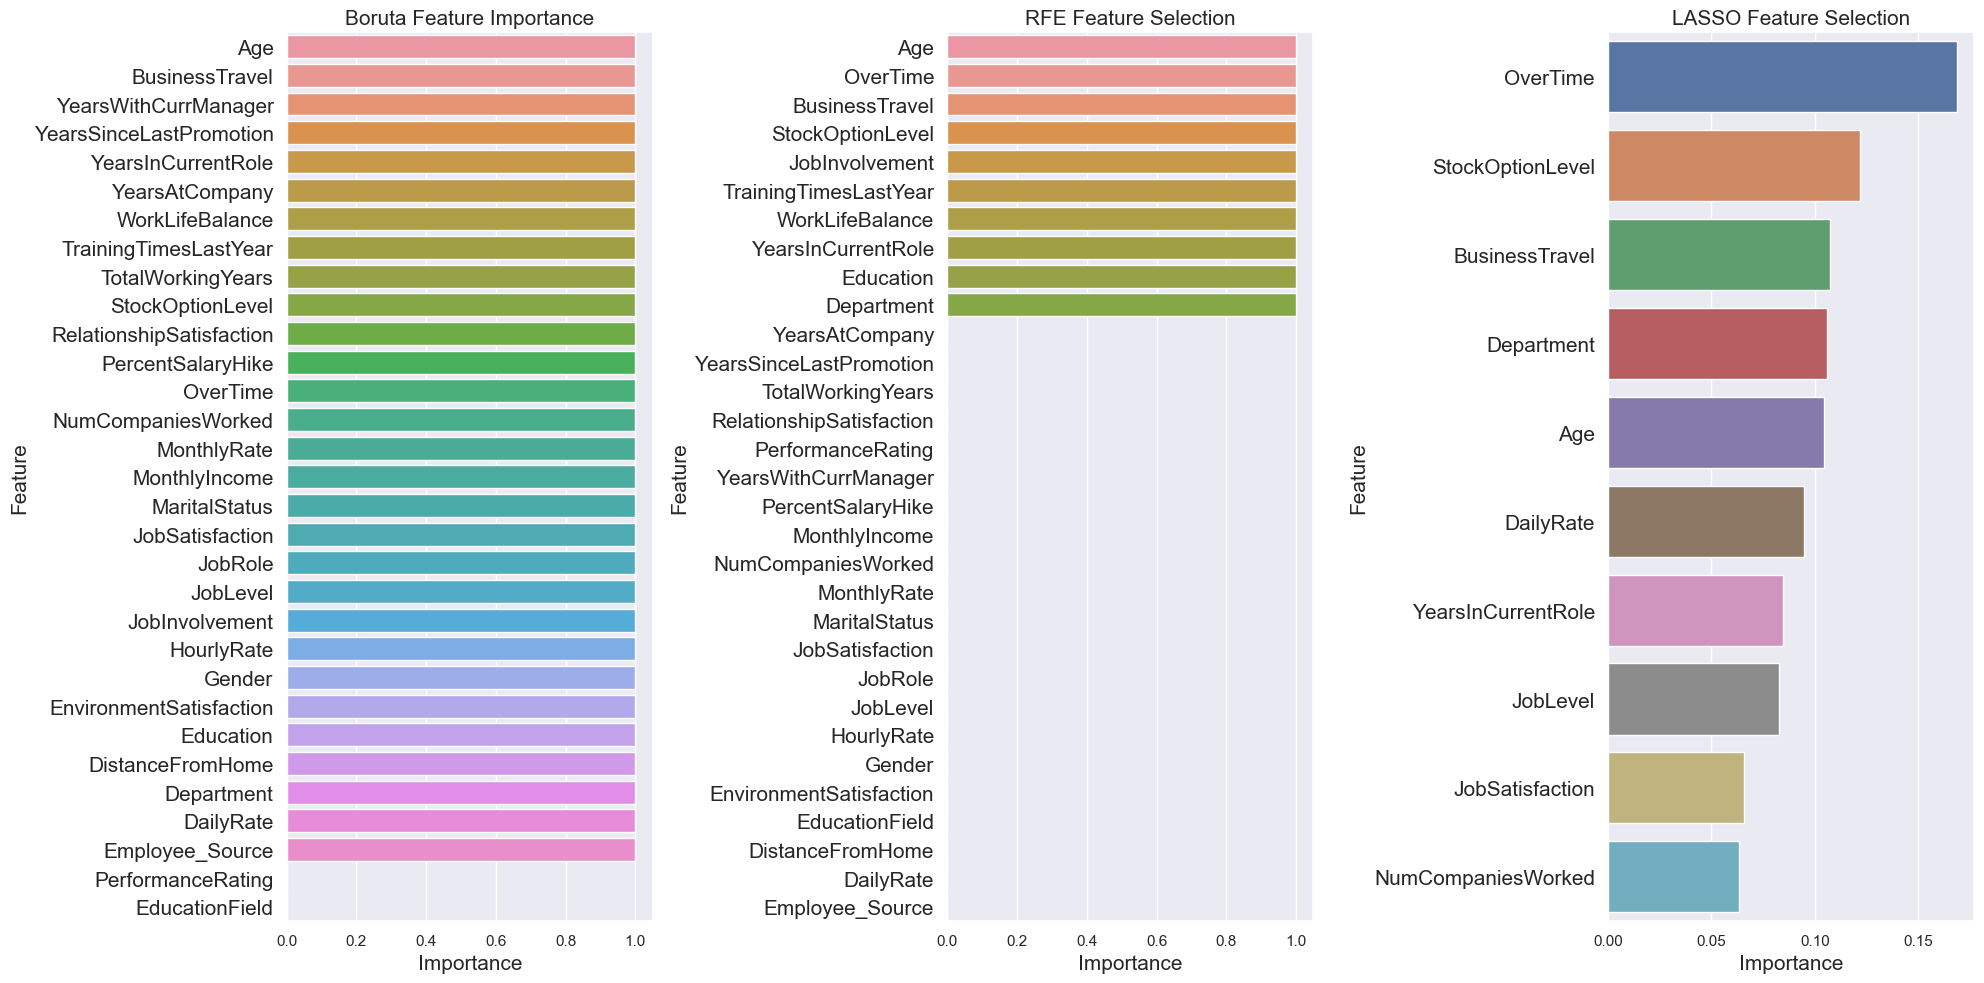

In [340]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Boruta
sns.barplot(x='Imp', y='Cols', data=selected_features_boruta, ax=axes[0])
axes[0].set_title('Boruta Feature Importance', fontsize=15)
axes[0].set_xlabel('Importance', fontsize=15)
axes[0].set_ylabel('Feature', fontsize=15)
axes[0].tick_params(axis='y', labelsize=15)

# RFE
sns.barplot(x='Imp', y='Cols', data=selected_features_rfe, ax=axes[1])
axes[1].set_title('RFE Feature Selection',fontsize=15)
axes[1].set_xlabel('Importance',fontsize=15)
axes[1].set_ylabel('Feature',fontsize=15)
axes[1].tick_params(axis='y', labelsize=15)  

# LASSO
sns.barplot(x='Importance', y='Feature', data=lasso_df, ax=axes[2])
axes[2].set_title('LASSO Feature Selection', fontsize=15)
axes[2].set_xlabel('Importance', fontsize=15)
axes[2].set_ylabel('Feature', fontsize=15)
axes[2].tick_params(axis='y', labelsize=15) 

plt.tight_layout()

plt.show()


# Strategic Approach:

* **1.Targeted Retention Programs:**

* **Key Factors:** Focus on addressing key factors identified by the XGBoostClassifier model, such as Age, overtime, DailyRate,
    HourlyRate, and DistanceFromHome.
* **Strategy:** Develop targeted retention programs tailored to different age groups, offering incentives, 
    and addressing concerns related to daily commuting and working hours.
* **Optimal algorithm:** XGBoostClassifier with 99.7% accuracy.

* **2. Employee Source Optimization:**

* **Key Factor:** Employee_Source has notable importance.
* **Strategy:** Enhance recruitment strategies from identified effective sources, and invest in employer branding to attract 
    and retain talent.

* **3. Career Development and Training:**

    
* **Key Factors:** Prioritize TotalWorkingYears, YearsAtCompany, and TrainingTimesLastYear.
* **Strategy:** Implement robust career development programs, mentorship initiatives, and continuous training opportunities to foster employee growth and engagement.

* **4. Work-Life Balance and Well-being:**

* **Key Factors:** WorkLifeBalance, EnvironmentSatisfaction, and RelationshipSatisfaction.
* **Strategy:** Promote a healthy work-life balance, conduct well-being programs, and address environmental and relationship satisfaction concerns through employee feedback mechanisms.

# Key Factors Impacting Attrition:

* **1.Age:**
    
Older employees may be more prone to attrition. Consider targeted retention strategies, mentorship programs, and flexible work arrangements.

* **2.Overtime:**

Address concerns related to overtime work. Evaluate workload distribution, consider workload balancing strategies, and promote
a healthy work-life balance to reduce burnout and attrition. Implement policies that address overtime issues and provide support
for employees managing their workload effectively.


* **3.DailyRate, HourlyRate, and DistanceFromHome:**
    
Address concerns related to compensation, work hours, and commuting distances. Evaluate and adjust policies to accommodate employee needs.

* **4.Employee_Source:**
    
Optimize recruitment efforts based on effective employee sources. Strengthen relationships with successful sources to attract and retain talent.

* **5.TotalWorkingYears and YearsAtCompany:**
    
Focus on career development, promotions, and recognition to retain employees with longer tenure.

* **6.TrainingTimesLastYear:**
    
Emphasize continuous learning and development opportunities to enhance job satisfaction and retention.

# Limitations and Assumptions:

* **1.Model Limitations:**
    

The XGBoostClassifier model is based on statistical patterns and may not capture causal relationships. Interpret results cautiously.


* **2.Feature Selection:**

Features selected by the model may not fully represent the complexity of human behavior. Consider incorporating additional qualitative data for a holistic understanding.


* **3.External Factors:**

The model might not account for external factors (economic conditions, industry trends) influencing attrition.

# Future Work:

* **1.Qualitative Analysis:**
    

Conduct qualitative interviews or surveys to gather employee feedback and insights that go beyond the scope of quantitative data.


* **2.Longitudinal Study:**

Extend the analysis over time to understand evolving patterns and assess the long-term impact of interventions.


* **3.Predictive Modeling Refinement:**

Continuously refine predictive models, considering different algorithms and exploring feature engineering techniques.


* **4.Employee Engagement Programs:**
    

Implement targeted employee engagement programs based on ongoing feedback to address evolving concerns.

## Conclusion

In conclusion, this project successfully addressed the task of predicting employee attrition. The models developed showcase good predictive performance, and the insights gained can be valuable for HR decision-making.


# -----------------------------------Thank you---------------------------------------------